### MTH 9875 The Volatility Surface:    Fall 2018

<p>

### Lecture 4: Simulation of the Heston model

Jim Gatheral   
Department of Mathematics   
  
$$
\newcommand{\Var}{\mathop{Var}}
$$



  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "right" width=500></h3>


 $$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\PP}{\mathbb{P} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\ee}[1]{\mathbb{E}\left[{#1}\right]}
\newcommand{\eef}[1]{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}
\newcommand{\Rplus}{\mathbb{R}_{\geqslant 0}}
\newcommand{\Rpplus}{\mathbb{R}_{> 0}}
\newcommand{\Rminus}{\mathbb{R}_{\leqslant 0}}
\newcommand{\p}{\partial}
\newcommand{\ui}{\textrm{i}}
\newcommand{\mP}{\mathbb{P}}
\newcommand{\mQ}{\mathbb{Q}}
\newcommand{\angl}[1]{\langle{#1}\rangle}
\newcommand{\var}{{\rm var}}
\newcommand{\cov}{{\rm cov}}
\newcommand{\covf}[1]{\cov\left[\left.{#1}\right|\cF_t\right]}
\newcommand{\varf}[1]{\var\left[\left.{#1}\right|\cF_t\right]}
$$  

### Outline of lecture 4

* The Feynman-Kac formula


* Simulation of the Heston model


* Heston variance simulation with partial or truncation


* The Ninomiya-Victoir scheme
    
    * Alfonsi's variance discretization
    * Full NV Heston discretization


### Numerical computation under stochastic volatility

* The popularity of the Heston model relates to the existence of a quasi-closed-form formula for European option prices.

    * To value other types of option, even American options, numerical computations are required.


* For other more realistic dynamics, numerical computation is always required.

    * For example, consider the much more realistic (lognormal) variance process:
<p>    
$$
dv_t=-\lambda\,(v_t-\bar v)\,dt+\xi\,v_t\,dW_t.
$$

* The two numerical techniques that are typically employed are:
    * Numerical PDE,
    * Monte Carlo simulation.

### Feynman-Kac

The Feynman-Kac formula relates the solution of a diffusion PDE to a probabilistic expectation, which may be computed using Monte Carlo simulation.


Specifically, consider the SDE

$$
dx_t=\mu_t\,dt+\sigma_t\,dZ_t
$$

and consider the discounted expectation of some function $V(x_T)$ of the terminal value $x_T$.  

Then, applying Itô's Lemma to

$$
f(x_t,t)=e^{-\int_0^t\,r_s\,ds}\,V(x_t,t),
$$

we obtain

$$
\beas
df &=& -r_t\,f\,dt+e^{-\int_0^t\,r_s\,ds}\,\partial_t V\,dt+\partial_x f\,dx+\frac{\sigma_t^2}2\,\partial_{x,x} f\,dt\\
&=& e^{-\int_0^t\,r_s\,ds}\,\left\{ -r_t\,V+\partial_t V+\mu\,\partial_x V+\frac{\sigma_t^2}2\,\partial_{x,x} V  \right\}\,dt + \partial_x V\,\sigma\,dZ.
\eeas
$$

Then, if $V(x,t)$ satisfies the PDE

$$
\partial_t V+\frac{\sigma_t^2}2\,\partial_{x,x} V+\mu_t\,\partial_x V-r_t\,V=0,
$$

we have $\E[df]=0$ and

$$
\E[f(x_T,T)]-f(x_t,t)=\int_t^T\,\E[df(x_s,s)]\,ds=0
$$

Rearranging gives

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
The Feynman-Kac formula</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
$$
V(x_t,t)=\E\left[e^{-\int_t^T\,r_s\,ds}\,V(x_T,T)\right]
$$
<br>
</div>
</blockquote>



In our case, we assume zero interest rates and the terminal condition is of the form $V(x,T) = g(x)$.  Then our problem is to compute

$$
V(x_t,t)=\mathbb{E}\left[V(x_T,T)|\mathcal{F}_t\right]= \mathbb{E}\left[g(x_T)|\mathcal{F}_t\right].
$$

### Implications for valuation of claims under stochastic volatility

* Risk-neutral (discounted) expectations of final payoffs may be valued using:

    * Numerical PDE,
    * Monte Carlo simulation.


* We may use whichever technique is more convenient.


* Numerical PDE techniques are well-explained in [Tavella and Randall]<sup id="cite_ref-TavellaRandall" class="reference"><a href="#cite_note-TavellaRandall"><span>[</span>9<span>]</span></a></sup>.

* We will focus on Monte Carlo simulation.


* Simulation

     * is in general easier to understand,
     * is less reliant on specialized artisanal knowledge,
     * can deal with higher dimensional processes (no *curse of dimensionality*).
  
  
* Numerical PDE can only work for low-dimensional Markovian models.
    * In particular, this excludes rough volatility models.

* Then, with $\Delta = (T-t)/n$ and $s=t+k\,\Delta$, define recursively

$$
x_{s+\Delta} = x_s + \mu\,\Delta + \sigma\,\sqrt{\Delta}\,Y_s.
$$


* If for example, the $Y_n$ were Bernoulli random variables, $\mathbb{E}\left[g(x_T)\right]$ would be computed as a sum of $2^n$ terms.

    * In practice of course, one would approximate this sum using Monte Carlo (MC) or quasi-Monte Carlo (QMC) methods.

### Weak and strong convergence

From page 327 of [Kloeden and Platen]<sup id="cite_ref-KloedenPlaten" class="reference"><a href="#cite_note-KloedenPlaten">[6]</a></sup>, a time discretization $\hat X$ with time increment $\Delta$ *converges weakly with order $\beta$* if there exists a constant $C$ such that

$$
\left|\E\left[g(\hat X_T)\right]-\E\left[g(X_T)\right]\right|\leq C\,\Delta^\beta
$$
as $\Delta \to 0$.


From page 323 of [Kloeden and Platen]<sup id="cite_ref-KloedenPlaten" class="reference"><a href="#cite_note-KloedenPlaten"><span>[</span>7<span>]</span></a></sup>, $\hat X$ with time increment $\Delta$ *converges strongly with order $\beta$* if there exists a constant $C$ such that

$$
\E\left[\left|\hat X_T-X_T\right|\right]\leq C\,\Delta^\beta
$$
as $\Delta \to 0$.


* The exponent $\beta$ is called the *order* of convergence.

### Monte Carlo simulation

Monte Carlo simulation proceeds in two steps:

1. Discretize the SDE with time step $\Delta = T/m$, denoting the discretized process by $\hat X_t$. This step induces a weak error
<br><br>$$
\epsilon_D = \E[g(X_T)] - \E[g(\hat X_T)] \sim \Delta^\beta.
$$<br>

2. Estimate the expectation of the discretized process as
<br><br>$$
\E[g(\hat X_T)] = \frac{1}{N}\,\sum_{i=1}^N\,g(\hat X_T^{(i)}).
$$

This step induces a statistical error

$$
\epsilon_S = \E[g(\hat X_T)] -  \frac{1}{N}\,\sum_{i=1}^N\,g(\hat X_T^{(i)}) \sim \frac{1}{\sqrt{N}}. 
$$

### Mean squared error (MSE)

If $\hat x$ is an estimator of some quantity $x$ (a Monte Carlo estimate for example), then

$$
\begin{eqnarray}
\mbox{MSE}(\hat x)&=&\E[(\hat x-x)^2]\\
&=&\left(\E[\hat x]-x\right)^2+\E\left[\left(\hat x-\E[\hat x]\right)^2\right]\\
&=&\text{Bias}^2(\hat x)+\text{Variance}(\hat x).
\end{eqnarray}
$$

* Bias relates to the discretization.

     * The number of timesteps and how accurately the target process is approximated over each timestep.


* The variance relates to the number of samples and how variance is reduced.

### Computational complexity

* Following page 365 of [Glasserman]<sup id="cite_ref-Glasserman" class="reference"><a href="#cite_note-Glasserman">[5]</a></sup>, denoting MSE by $\epsilon^2$, we have

<a name="eq:MSE"></a>(1)
$$
\epsilon^2 \sim \epsilon_D^2 + \epsilon_S^2 = c_1\,\Delta^{2\,\beta} + \frac{c_2}{N} 
$$

for some constants $c_1$ and $c_2$.

* The computational cost $\mathcal{C}$ is is proportional to

$$
m \times N  = \frac{T}{\Delta}\,N
$$

so

$$
\epsilon^2 \sim c_1\,\Delta^{2\,\beta} + \frac{c_3}{\mathcal{C}\,\Delta} 
$$

for some $c_3$. 

* Minimizing MSE for fixed cost $\mathcal{C}$ gives

$$
\Delta \propto \mathcal{C}^{-\frac{1}{2\,\beta + 1}}.
$$

### Optimal allocation of computational budget

Substituting back into [(1)](#eq:MSE), we obtain

$$
\epsilon^2 \sim c_1\,\mathcal{C}^{-\frac{2\,\beta}{2\,\beta + 1}} + c_2\,T\,\mathcal{C}^{-\frac{2\,\beta}{2\,\beta + 1}} \propto \mathcal{C}^{-\frac{2\,\beta}{2\,\beta + 1}}.
$$

The optimal allocation thus balances bias squared and variance.

* For the Euler scheme with Lipschitz payoff, $\beta = 1$ so $\epsilon \sim \mathcal{C}^{-1/3}$.
* For the Milstein scheme with Lipschitz payoff, $\beta = 2$ so $\epsilon \sim \mathcal{C}^{-2/5}$.
* If the discretization is unbiased,  $\epsilon \sim \mathcal{C}^{-1/2}$.

Thus, in the limit where very high accuracy is required, the better the discretization, the lower the computational cost.

* Although in practice, we have to take into account that a better discretization may involve more computation per time step.

### Why fast Monte Carlo?

* For pricing, a not-very-fast Monte Carlo routine might suffice.


* For model calibration, we need fast Monte Carlo.

    * Fitting a model to the data involves many calls to the pricing routine with different parameter sets.

* However fast Monte Carlo is only needed for European options.

    * We want to calibrate complex models to vanilla option prices.
    
    * Even if vanilla options are American-style, we can fairly accurately approximate Black-Scholes implied volatility.  See for example [Glau et al.]<sup id="cite_ref-GlauEtAl" class="reference"><a href="#cite_note-GlauEtAl"><span>[</span>3<span>]</span></a></sup>.


* We are then only concerned with the order of weak convergence.

    * In contrast, the order of strong convergence may be relevant for barrier or lookback options.

### Heston simulation: General remarks

* Heston is popular because there is a quasi-closed form formula for European options.


* The Heston model is in fact very tricky to simulate.
    * This relates to the propensity of the Heston variance process to go to zero.
    * This same property makes Heston dynamics very unrealistic.
    

* If we can figure out how to simulate Heston efficiently, other stochastic volatility models will be easier.

### Variations on the BCC parameters

In numerical examples, we will consider the following parameter sets with $\eta$ halved and doubled relative to BCC:

<div align="center">Table 1: BCC and BCC2 parameters 

  |BCC|BCC1|BCC2
:------:|:------:|:----------:|:------:
$v$|$0.04$|$0.04$|$0.04$
$\bar v$|$0.04$|$0.04$|$0.04$
$\lambda$|$1.15$|$1.15$|$1.15$
$\rho$|$-0.64$|$-0.64$|$-0.64$
$\eta$|$~~0.39~~$|$~~0.39/2~~$|$~~0.39\times 2~~$
$~~\frac{2\,\lambda\,\bar v}{\eta^2}~~$|$0.60$|$2.42$|$0.15$

### Boundary behaviors of variance processes

Consider a fairly generic variance process:

<a name="eq:HestonVariance"></a>(2)
$$
dv=-\lambda\,(v-\bar v)\,dt+\eta\,v^\alpha\,dZ
$$

<blockquote><div style="background-color:#add8e6; color:#FFFFFF; font-style: normal;  " ><h4>
Proposition 2.1 of Andersen and Piterbarg</h4>
</div>
<div style="background-color:#E8E8E8; color:#000000; font-style: normal; ">
<br>
For the process [(2)](#eq:HestonVariance), the following holds: 

<p>
    1. $0$ is always an attainable boundary for $0 < \alpha < 1/2$;<br>
    2. $0$ is an attainable boundary for $\alpha=1/2$ if $2\,\lambda\,\bar v < \eta^2$ ;<br>
    3. $0$ is an unattainable boundary for $\alpha > 1/2$;<br>
    4. $\infty$ is an unattainable boundary for all values of $\alpha>0$.
<br>
</div>
</blockquote>

### Implications for Heston


* Then, with BCC1 parameters, the Heston variance process does not hit zero.

* On the other hand, with both BCC and BCC2 parameters, the process can hit zero and does spend considerable time in the neighborhood of zero.

    * If the discretized variance process can go negative, this may lead to substantial bias.

### Lord, Koekkoek and Van Dyck

Write the Heston variance process as

$$
v_{t+\Delta}=f_1(v_t)-\lambda\,\left(f_2(v_t)-\bar v\right)\,\Delta+\eta\,\left(f_3(v_t)\right)^\alpha\,\sqrt{\Delta}\,Z
$$

with $Z \sim N(0,1)$.   [Lord, Koekkoek and Van Dyck]<sup id="cite_ref-LKV" class="reference"><a href="#cite_note-LKV">[7]</a></sup> classify discretization schemes as follows:

<div align="center">Table 2: Fixing functions $f_i(\cdot)$ in various discretizations. 

 Scheme|$~~~f_1(x)~~~$|$~~~f_2(x)~~~$|$~~~f_3(x)~~~$
:------|:------:|:----------:|:------:
Absorption|$x^+$|$x^+$|$x^+$
Reflection|$|x|$|$|x|$|$|x|$
Higham and Mao|$x$|$x$|$|x|$
Partial truncation|$x$|$x$|$x^+$
Full truncation|$x$|$x^+$|$x^+$

Based on results of numerical experiments, Lord et al. recommend full truncation.

### Comments on discretization of the Heston variance process

* The choice of discretization makes a *big* difference.
    * The choices of discretization presented in *The Volatility Surface*<sup id="cite_ref-TVS" class="reference"><a href="#cite_note-TVS"><span>[</span>5<span>]</span></a></sup> are particularly horrible; hundreds of thousands of time steps are required to get decent convergence with typical Heston parameters.
   

* We will follow LKV's advice and implement full truncation.  Specifically, we will discretize the Heston variance process as

$$
v_{t+\Delta}=v_t - \lambda\,\left(v_t^+-\bar v\right)\,\Delta+\eta\,\sqrt{v_t^+}\,\sqrt{\Delta}\,Z.
$$

### Richardson extrapolation

Suppose that the Euler scheme generates an estimate of the true value of a claim as follows:

$$
\E\left[g(\hat X_T)\right]=\E\left[g(X_T)\right]+c\,\Delta  + \mathcal{O}(\Delta^2)
$$

where $\hat X$ is an approximation to $X$ based on this Euler discretization scheme.  This is true under strong regularity assumptions on the drift and diffusion coefficients in the underlying SDE.

Then for positive integer $M$ (typically $M=2$), we have

$$
\frac{M}{M-1}\,\E\left[g\left(\hat X^{\Delta}_T\right)\right]-\frac{1}{M-1}\,\E\left[ g\left(\hat X^{M \Delta}_T\right)\right]=\E\left[g(X_T)\right] + \mathcal{O}(\Delta^2)
$$

* Convergence looks linear for our Euler discretizations so Richardson extrapolation might work in this case, giving order 2 weak convergence.

### Variance of extrapolated estimate

Following [Glasserman]<sup id="cite_ref-Glasserman" class="reference"><a href="#cite_note-Glasserman"><span>[</span>5<span>]</span></a></sup> again (page 361), note that

\begin{eqnarray}
&&\Var\left[  \frac{M}{M-1}\,g\left(\hat X^{\Delta}_T\right)-\frac{1}{M-1}\, g\left(\hat X^{M \Delta}_T\right)  \right]\\
&=& \frac{M^2}{(M-1)^2}\,\Var\left[  g\left(\hat X^{\Delta}_T\right)  \right] +
 \frac{1}{(M-1)^2}\,\Var\left[  g\left(\hat X^{M \Delta}_T\right)  \right]  \\
 && \quad\quad\quad - \frac{2\,M}{(M-1)^2}\,\Cov\left[  g\left(\hat X^{\Delta}_T\right), g\left(\hat X^{M \Delta}_T\right)  \right] .
\end{eqnarray}

One might hope, and this is typically the case, that by using the same random numbers to simulate $\hat X^{\Delta}_T$ and $\hat X^{M \Delta}_T$, the covariance term would be positive.  However, in the case of the Heston model, especially with BCC2 parameters, this is not at all guaranteed.

* If the covariance term is zero or negative, the variance of the extrapolated estimate is greater than that of the original estimate (although the bias is smaller).

We now check the Feller condition to see whether 0 is attainable.  Recall from Proposition 2.1 of Andersen and Piterbarg above that $0$ is attainable if $2\,\lambda\,\bar v/\eta^2 <1$.

### Heston parameters

In [1]:
paramsBCC <- list(lambda = 1.15,rho = -0.64,eta = 0.39,vbar = 0.04,v = 0.04) 
paramsBCC1 <- list(lambda = 1.15,rho = -0.64,eta = .39/2,vbar = 0.04,v = 0.04) 
paramsBCC2 <- list(lambda = 1.15,rho = -0.64,eta = 0.39*2,vbar = 0.04,v = 0.04) 

In [2]:
feller <- function(params){2*params$lambda*params$vbar/(params$eta)^2}

c(feller(paramsBCC),feller(paramsBCC1),feller(paramsBCC2))

[1] 0.6048652 2.4194609 0.1512163

As we noted earlier, with both BCC and BCC2 parameters, zero is attainable.

### Download some code

In [3]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/09/9875-4.zip", destfile="9875-4.zip")
unzip(zipfile="9875-4.zip")
source("BlackScholes.R")
source("Lewis.R")
source("Heston.R")

A useful function

In [4]:
impvolHeston <- function(params)function(k,t){impvol.phi(phiHeston(params))(k,t)}

### Exact Heston implied volatility computations

To compute the bias of a simulation scheme, we need to know exact implied volatilities.

In [5]:
strikes <- c(0.8,1.0,1.2) 
print(exactHestonVolsBCC <- sapply(strikes,function(K){impvolHeston(paramsBCC)(log(K),1)}) )
print(exactHestonVolsBCC1 <- sapply(strikes,function(K){impvolHeston(paramsBCC1)(log(K),1)}) )
print(exactHestonVolsBCC2 <- sapply(strikes,function(K){impvolHeston(paramsBCC2)(log(K),1)}) )


[1] 0.2289957 0.1817281 0.1520478
[1] 0.2184855 0.1940710 0.1748623
[1] 0.2320480 0.1532666 0.1334544


Note how the skew increases as we increase $\eta$!

### Code for Euler with  partial truncation

Recall that this discretization reads:

$$
v_{t+\Delta}=v_t - \lambda\,\left(v_t-\bar v\right)\,\Delta+\eta\,\sqrt{v_t^+}\,\sqrt{\Delta}\,Z.
$$

In [6]:
evolveEulerP <- function(v,x,dt,Z,W,i){

        #Variance process
        v2 <- (v > 0) * v  # Take v2 = 0 if v<0, else v2=v
        vf <- v - lambda*(v-vbar)*dt +eta * sqrt(v2)*sqrt(dt)*W 

        # Log-stock process
        x <- x  - (v+vf)/4*dt + sqrt(v2*dt) * Z
        # Impose martingale constraint
        x <- x - log(mean(exp(x))) 
        v <- vf 
        
        return(cbind(x,v)) 
}

### Code for Euler with  full truncation

Recall that this discretization reads:

$$
v_{t+\Delta}=v_t - \lambda\,\left(v_t^+-\bar v\right)\,\Delta+\eta\,\sqrt{v_t^+}\,\sqrt{\Delta}\,Z.
$$

In [7]:
evolveEulerF <- function(v,x,dt,Z,W,i){

        #Variance process
        v2 <- (v > 0) * v  # Take v2 = 0 if v<0, else v2=v
        vf <- v - lambda*(v2-vbar)*dt +eta * sqrt(v2)*sqrt(dt)*W 

        # Log-stock process
        x <- x  - (v+vf)/4*dt + sqrt(v2*dt) * Z
        # Impose martingale constraint
        x <- x - log(mean(exp(x))) 
        v <- vf 
        
        return(cbind(x,v)) 
}

### Heston code that uses the above time discretization

Note that the code also does Richardson extrapolation.

In [8]:
is.even <- function(j){as.logical((j+1) %% 2)} # A little function needed later

HestonMC <- function(params){
    
    res <- function(S0, T, AK, N, m, evolve,exactVols=NULL)
    {
  
    lambda <<- params$lambda 
    rho <<- params$rho 
    eta <<- params$eta 
    vbar <<- params$vbar 
    v0 <<- params$v 
    
   	phi <<- sqrt(1-rho^2) 
  
    n <- m*2  #n is number of timesteps = 2*m so we can use Richardson extrapolation
    sqrt2 <- sqrt(2) 
    rho2m1 <- sqrt(1-rho*rho) 
    
    negCount <- 0 
    
    # We use a vertical array, one element per M.C. path
    x <- rep(0,N); v <- rep(1,N)*v0 
    xm <- x; vm <- v 
    W1m <- rep(0,N); W2m <- rep(0,N)  
  
    # Loop for bias computation (N small, n big)
    for (i in 1:n)
    {
        # Two sets of correlated normal random vars.
        
        W1 <- rnorm(N) 
        W2 <- rnorm(N) 
        W1 <- W1 - mean(W1);  W1 <- W1/sd(W1) 
        W2 <- W2 - mean(W2);  W2 <- W2/sd(W2) 
        # Now W1 and W2 are forced to have mean=0 and sd=1
        
        W2p <- W2 - cor(W1,W2)*W1  # Eliminate actual correlation
        W2p <- W2p - mean(W2p);  W2 <- W2p/sd(W2p) 
        W2 <- rho*W1 + rho2m1*W2  
        # Now W1 and W2 have mean=0, sd=1 and correlation rho
    
        # Add code for subgrid
        W1m <- W1m + W1/sqrt2;  W2m <- W2m + W2/sqrt2  # N(0,1) rv's for subgrid
       
        if (is.even(i)) {
            #print(c(i,mean(W1m),mean(W2m),sd(W1m),sd(W2m),cor(W1m,W2m))) 
            resm <- evolve(vm,xm,T/m,W1m,W2m,i/2) 
            xm <- resm[,1] 
            vm <- resm[,2] 
            W1m <- rep(0,N);  W2m <- rep(0,N) 
        }
    
        res <- evolve(v,x,T/n,W1,W2,i) 
        x <- res[,1] 
        v <- res[,2] 
        negCount <- negCount +mean(v<0)/n  #Probability of negative variance per path per timestep
    
  }

    S <- S0*exp(x) 
    Sm <- S0*exp(xm) 

    # Now we have 2 vectors (length N) of final stock prices
  
    M <- length(AK) 
    AV <- numeric(M); AVdev <- numeric(M) 
    BSV <- numeric(M); BSVH <- numeric(M);  BSVL <- numeric(M) 
    iv2SD <- numeric(M);  bias <- numeric(M) 
    AVm <- numeric(M);  AVmdev <- numeric(M) 
    BSVm <- numeric(M);  BSVHm <- numeric(M);  BSVLm <- numeric(M) 
    iv2SDm <- numeric(M) 
    AV1 <- numeric(M);  AV1dev <- numeric(M) 
    BSV1 <- numeric(M); BSVH1 <- numeric(M); BSVL1 <- numeric(M) 
    iv2SDrom <- numeric(M); biasRom <- numeric(M) 
  
  # Evaluate mean call value for each path
  for (i in 1:M)
  {
    # 2*m timesteps
    K <- AK[i] 
    V <- (S>K)*(S - K)  # Boundary condition for European call
    AV[i] <- mean(V) 
    AVdev[i] <- sqrt(var(V)/length(V)) 
    
    BSV[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i]) 
    BSVL[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] - AVdev[i]) 
    BSVH[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] + AVdev[i]) 
    iv2SD[i] <- (BSVH[i]-BSVL[i]) 
    
    # m timesteps
    Vm <- (Sm>K)*(Sm - K)  # Boundary condition for European call
    AVm[i] <- mean(Vm) 
    AVmdev[i] <- sd(Vm) / sqrt(N) 
    BSVm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i]) 
    BSVLm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] - AVmdev[i]) 
    BSVHm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] + AVmdev[i]) 
    iv2SDm[i] <- (BSVH[i]-BSVL[i]) 
    
    # Richardson estimates 
    V1 <- 2*V - Vm 
    AV1[i] <- mean(V1) 
    AV1dev[i] <- sd(V1) / sqrt(N) 
    BSV1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i]) 
    BSVL1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] - AV1dev[i]) 
    BSVH1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] + AV1dev[i]) 
    iv2SDrom[i] <- (BSVH1[i]-BSVL1[i]) 
    
    if(!is.null(exactVols)) {bias <- BSV-exactVols} 
    if(!is.null(exactVols)) {biasRom <- BSV1-exactVols} 
  }
  
  l.AK <- length(AK)      
  data.out <- data.frame(AK,rep(N,l.AK),rep(2*m,l.AK),BSV,bias,iv2SD,BSVm,BSV1,biasRom,iv2SDrom) 
  names(data.out) <- c("Strikes","Paths","Steps","ivol","bias","twoSd","ivolm", "ivolRichardson", "biasRichardson","twoSdRichardson") 
  return(data.out) 
  
  
}
return(res) 
}

Here's an example of a function call:

In [9]:
HestonMC(paramsBCC)(S0=1, T=1, strikes, N=1000000, m=16, evolve=evolveEulerF, exactVols=exactHestonVolsBCC) 

Strikes Paths Steps ivol      bias         twoSd        ivolm    
1 0.8     1e+06 32    0.2294468 0.0004510717 0.0013893767 0.2300874
2 1.0     1e+06 32    0.1824417 0.0007135747 0.0004955921 0.1833914
3 1.2     1e+06 32    0.1528274 0.0007796823 0.0003557089 0.1539332
  ivolRichardson biasRichardson twoSdRichardson
1 0.2288045      -0.0001912469  0.0014565456   
2 0.1814921      -0.0002360466  0.0005282382   
3 0.1517103      -0.0003375034  0.0003893826

### Convergence with BCC parameters

In [10]:
load("mc.convergence.rData")

In [11]:
library(repr)
options(repr.plot.height=5)

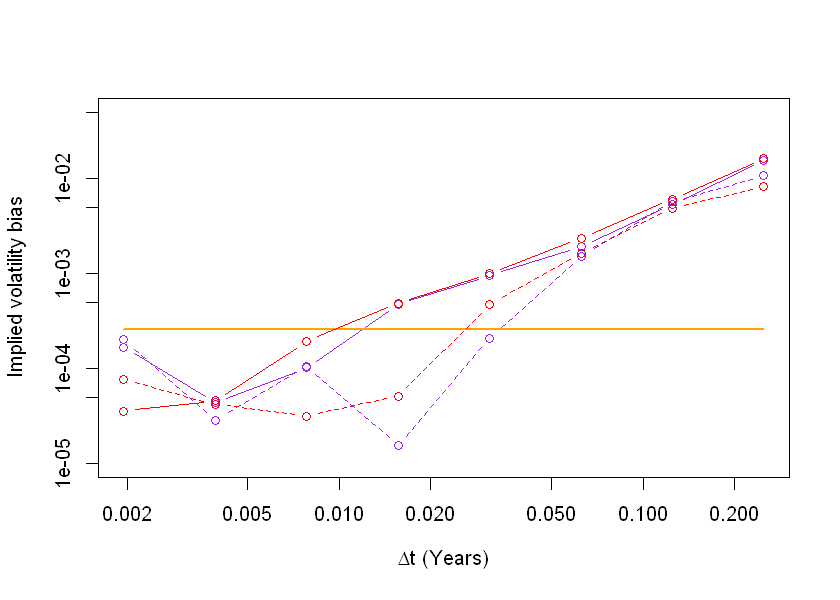

In [12]:
tmp <- resF.BCC
sdThreshold <- mean(tmp$twoSd)
plot(1/tmp$Steps,abs(tmp$bias),type="b",log="xy",col="purple",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="purple",lty=2)
curve(sdThreshold+x*0,from=1/512, to=1/4,add=T,col="orange",lwd=2)
tmp <- resP.BCC
lines(1/tmp$Steps,abs(tmp$bias),type="b",col="red",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="red",lty=2)

Figure 1: One year option, $K=1.2$ with BCC parameters.  Euler with partial truncation in red; full truncation in purple; dashed lines are from Richardson extrapolation.

* The difference between partial and full truncation seems to be minimal; full truncation wins by a hair.

### Convergence with BCC2 parameters

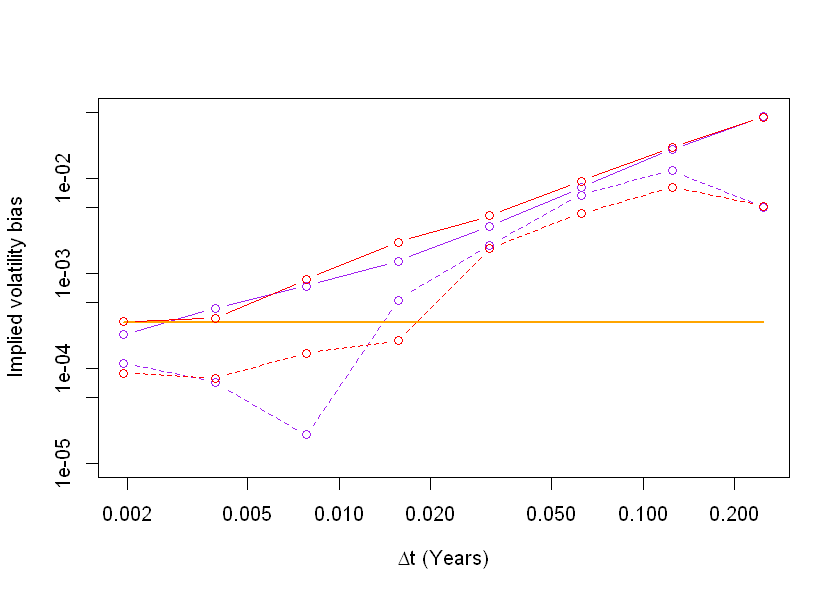

In [13]:
tmp <- resF.BCC2
sdThreshold <- mean(tmp$twoSd)
plot(1/tmp$Steps,abs(tmp$bias),type="b",log="xy",col="purple",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="purple",lty=2)
curve(sdThreshold+x*0,from=1/512, to=1/4,add=T,col="orange",lwd=2)
tmp <- resP.BCC2
lines(1/tmp$Steps,abs(tmp$bias),type="b",col="red",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="red",lty=2)

Figure 2: One year option, $K=1.2$ with BCC2 parameters.  Euler with partial truncation in red; full truncation in purple; dashed lines are from Richardson extrapolation.

* Again, full truncation wins by a hair.

### Formal solution of the Heston SDE

$$
\newcommand{\E}{\mathbb{E}}
$$

We write the Heston SDE in the form

\begin{eqnarray*}
d \log S_t &=&-\frac{v_t}{2}\,dt+\sqrt{v_t}\,\left\{\rho\,dW_t+\sqrt{1-\rho^2}\,dW_t^\perp\right\}\\
dv_t&=&-\lambda(v_t-\bar v)\,dt+\eta\,\sqrt{v_t}\,dW_t
\end{eqnarray*}

The exact solution may then be written as

<a name="eq:BroadieKaya"></a>(3)
$$
\begin{eqnarray*}
S_t&=&S_0\,\exp\left\{-\frac{1}{2}\,\int_0^t\,v_s\,ds+\rho\,\int_0^t\,\sqrt{v_s}\,dW_s\\+\sqrt{1-\rho^2}\,\int_0^t\sqrt{v_s}\,dW_s^\perp\,\right\}\nonumber\\
v_t&=&v_0+\lambda\,\bar v \,t
-\lambda\,\int_0^t\,v_s\,ds+\eta\,\int_0^t\,\sqrt{v_s}\,dW_s
\end{eqnarray*}
$$

with
$
\E[dW_s \,{dW_s^\perp}] =0
$.

### Andersen's simulation procedure

* [Andersen]<sup id="cite_ref-Andersen" class="reference"><a href="#cite_note-Andersen"><span>[</span>2<span>]</span></a></sup> proposes to simulate processes like the square-root variance process by sampling from a distribution that is similar to the true distribution but not the same.

    * This approximate distribution should have at least the same mean and variance as the true distribution.
    * More generally, this distribution should have a similar shape.

* Applying his approach to simulating the Heston process, we would have to at least find the means and variances of $\int_0^t\,\sqrt{v_s}\,dW_s$, $\int_0^t \,v_s\, ds$, $v_t$ and $v_0$.

    * This can only be done when the mean and variance are computable.
    * These moments are computable in the case of the Heston model.


* Again, we want to focus on generic techniques.

### Cross terms

* We have discretized the stock and variance parts of the Heston SDE to $\mathcal{O}(\Delta)$ separately.

    * In principle, we pick up higher order cross terms too.
    * However, the conditions for higher order schemes such as Milstein are not met in the Heston model so some say there is little advantage in getting more complicated.

* Andersen disagrees.

    * So far, we have discretized $x=\log S$ as 
<br><br><a name="eq:31"></a>(4)
$$
x_{t+\Delta}=x_t-\frac14\,(v_t+v_{t+\Delta})\,\Delta +\sqrt{v_t}\,\sqrt{\Delta}\,Z
$$
with $\E[W \,Z]=\rho$.

    * He observes that if there is a significant probability of a negative $v$, the actual correlation between $\Delta v$ and $\Delta x$ will not be $\rho$ because $v$ has been truncated.

### Leaking correlation



Quote from [Andersen]<sup id="cite_ref-Andersen" class="reference"><a href="#cite_note-Andersen"><span>[</span>2<span>]</span></a></sup>
>If one were to "insist on using [(4)](#eq:31), at practical levels of $\Delta$, one would experience a strong tendency for the Monte Carlo simulation to generate too feeble effective correlation and, consequently, paths of $x$ with poor distribution tails.  In call option pricing terms, this would manifest itself in an overall poor ability to price options with strikes away from at-the-money."

### Andersen's solution

Noting that

$$
\eta\,\sqrt{v_t}\,\sqrt{\Delta} \,W = v_{t+\Delta}-v_t+\lambda\,(v_t-\bar v)\,\Delta,
$$

and motivated by the exact formal expression [(3)](#eq:BroadieKaya), Andersen suggests the following $x$-discretization instead:

<a name="eq:33"></a>(5)
\begin{eqnarray}
x_{t+\Delta}&=&x_t+\left(\frac{\rho}{\eta}-\frac12\right)\,(v_t+v_{t+\Delta})\,\Delta
\\&&\qquad+\frac{\rho}{\eta}\,\left[v_{t+\Delta}-v_t+\lambda\,(v_t-\bar v)\,\Delta \right]\nonumber\\
&&\quad\quad\quad+\sqrt{1-\rho^2}\,\sqrt{\frac12(v_t+v_{t+\Delta})}\,\sqrt{\Delta}\,W^\perp
\end{eqnarray}

where $W^\perp$ is orthogonal to $W$ (from the variance process).

* Let's check to see if [(5)](#eq:33) really does better than [(4)](#eq:31)!

### Code for Andersen discretization

First the `EulerF` timestep with Andersen $x$-discretization:

In [14]:
evolveEulerFAndersen <- function(v,x,dt,Z,W,i){
        
        #Variance process
        v2 <- (v > 0) * v  # Take v2 = 0 if v<0, else v2=v
        vf <-  v - lambda*(v2 - vbar)*dt +eta * sqrt(v2)*sqrt(dt)*W 
                               
        # Log-stock process (Andersen equation (33))
        vvf <- (v+vf > 0) * (v+vf) 
        dw <- vvf/2*dt 
        x <- x  - dw/2 + rho2m1*sqrt(dw)*Z +
            rho/eta*(lambda*dw + vf-v -lambda*vbar*dt)  
        # Impose martingale constraint
        x <- x - log(mean(exp(x))) 
        v <- vf 
        return(cbind(x,v)) 
}

This new x-discretizations needs a new Monte Carlo routine:

In [15]:
HestonMCAndersen <- function(params){
    
    res <- function(S0, T, AK, N, m, evolve,exactVols=NULL)
    {
  
    lambda <<- params$lambda 
    rho <<- params$rho 
    eta <<- params$eta 
    vbar <<- params$vbar 
    v0 <<- params$v 
  
    n <- m*2  #n is number of timesteps = 2*m so we can use Romberg extrapolation
    sqrt2 <- sqrt(2) 
    rho2m1 <<- sqrt(1-rho*rho) 
    
    negCount <- 0 
    
    # We use a vertical array, one element per M.C. path
    x <- rep(0,N);  v <- rep(1,N)*v0 
    xm <- x;  vm <- v 
    W1m <- rep(0,N);  W2m <- rep(0,N)  
  
    # Loop for bias computation (N small, n big)
    for (i in 1:n)
    {
        # Two sets of correlated normal random vars.
        
        W1 <- rnorm(N) 
        W2 <- rnorm(N) 
        W1 <- W1 - mean(W1);  W1 <- W1/sd(W1) 
        W2 <- W2 - mean(W2);  W2 <- W2/sd(W2) 
        # Now W1 and W2 are forced to have mean=0 and sd=1
        
        W2p <- W2 - cor(W1,W2)*W1  # Eliminate actual correlation
        W2p <- W2p - mean(W2p);  W2 <- W2p/sd(W2p)  
        # Now W1 and W2 have mean=0, sd=1 and correlation=0
    
        # Add code for subgrid
        W1m <- W1m + W1/sqrt2;  W2m <- W2m + W2/sqrt2  # N(0,1) rv's for subgrid
       
        if (is.even(i)) {
            resm <- evolve(vm,xm,T/m,W1m,W2m,i/2) 
            xm <- resm[,1] 
            vm <- resm[,2] 
            W1m <- rep(0,N);  W2m <- rep(0,N) 
        }
    
        res <- evolve(v,x,T/n,W1,W2,i) 
        x <- res[,1] 
        v <- res[,2] 
        negCount <- negCount +mean(v<0)/n  #Probability of negative variance per path per timestep
    
  }

    S <- S0*exp(x) 
    Sm <- S0*exp(xm) 

    # Now we have three vectors of final stock prices
  
    M <- length(AK) 
    AV <- numeric(M);  AVdev <- numeric(M) 
    BSV <- numeric(M) ; BSVH <- numeric(M);  BSVL <- numeric(M) 
    iv2SD <- numeric(M);  bias <- numeric(M) 
    AVm <- numeric(M);  AVmdev <- numeric(M) 
    BSVm <- numeric(M);  BSVHm <- numeric(M);  BSVLm <- numeric(M) 
    iv2SDm <- numeric(M) 
    AV1 <- numeric(M);  AV1dev <- numeric(M) 
    BSV1 <- numeric(M);  BSVH1 <- numeric(M);  BSVL1 <- numeric(M) 
    iv2SDrom <- numeric(M); biasRom <- numeric(M) 
  
  # Evaluate mean call value for each path
  for (i in 1:M)
  {
    # 2*m timesteps
    K <- AK[i] 
    V <- (S>K)*(S - K)  # Boundary condition for European call
    AV[i] <- mean(V) 
    AVdev[i] <- sqrt(var(V)/length(V))
    
    BSV[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i]) 
    BSVL[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] - AVdev[i]) 
    BSVH[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] + AVdev[i]) 
    iv2SD[i] <- (BSVH[i]-BSVL[i]) 
    
    # m timesteps
    Vm <- (Sm>K)*(Sm - K)  # Boundary condition for European call
    AVm[i] <- mean(Vm) 
    AVmdev[i] <- sd(Vm) / sqrt(N) 
    BSVm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i]) 
    BSVLm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] - AVmdev[i]) 
    BSVHm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] + AVmdev[i]) 
    iv2SDm[i] <- (BSVH[i]-BSVL[i]) 
    
    # Romberg estimates 
    V1 <- 2*V - Vm 
    AV1[i] <- mean(V1) 
    AV1dev[i] <- sd(V1) / sqrt(N) 
    BSV1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i]) 
    BSVL1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] - AV1dev[i]) 
    BSVH1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] + AV1dev[i]) 
    iv2SDrom[i] <- (BSVH1[i]-BSVL1[i]) 
    
    if(!is.null(exactVols)) {bias <- BSV-exactVols} 
    if(!is.null(exactVols)) {biasRom <- BSV1-exactVols} 
  }
  
  l.AK <- length(AK)      
  data.out <- data.frame(AK,rep(N,l.AK),rep(2*m,l.AK),BSV,bias,iv2SD,BSVm,BSV1,biasRom,iv2SDrom) 
  names(data.out) <- c("Strikes","Paths","Steps","ivol","bias","twoSd","ivolm", "ivolRichardson", "biasRichardson","twoSdRichardson") 
  return(data.out) 
  
}
return(res) 
}

### Example of function call

In [16]:
HestonMCAndersen(paramsBCC)(S0=1, T=1, strikes, N=100000, m=16, evolve=evolveEulerFAndersen, exactVols=exactHestonVolsBCC) 

Strikes Paths Steps ivol      bias         twoSd       ivolm    
1 0.8     1e+05 32    0.2307839 0.0017881485 0.004368571 0.2324400
2 1.0     1e+05 32    0.1829000 0.0011718570 0.001564757 0.1840025
3 1.2     1e+05 32    0.1524469 0.0003991672 0.001129774 0.1523772
  ivolRichardson biasRichardson twoSdRichardson
1 0.2291167      0.0001210120   0.004577552    
2 0.1817976      0.0000694464   0.001656310    
3 0.1525166      0.0004688019   0.001209160

### Convergence with BCC parameters

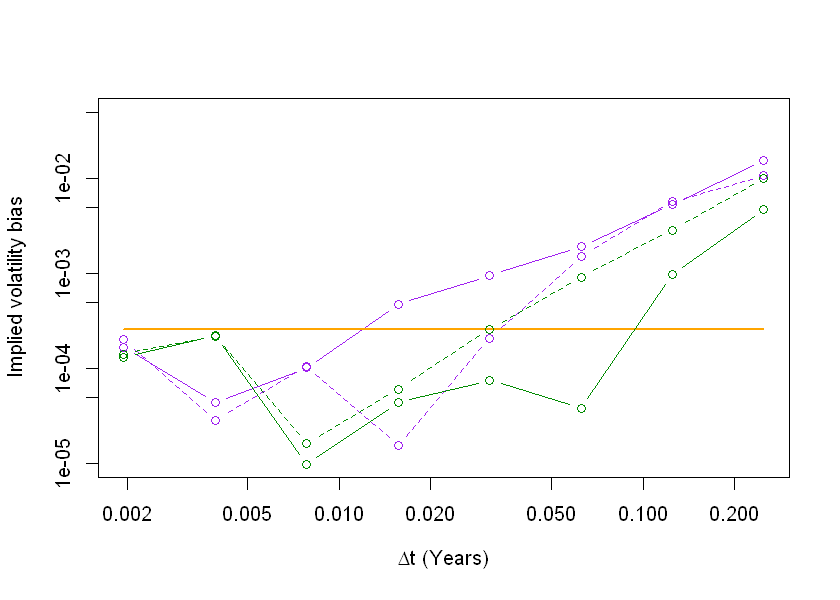

In [17]:
tmp <- resF.BCC
sdThreshold <- mean(tmp$twoSd)
plot(1/tmp$Steps,abs(tmp$bias),type="b",log="xy",col="purple",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="purple",lty=2)
curve(sdThreshold+x*0,from=1/512, to=1/4,add=T,col="orange",lwd=2)
tmp <- resFAndersen.BCC
lines(1/tmp$Steps,abs(tmp$bias),type="b",col="green4",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="green4",lty=2)

Figure 3: One year option, $K=1.2$ with BCC parameters.  Euler with full truncation in purple;  with Andersen $x$-discretization in green; dashed lines are from Richardson extrapolation.

* Andersen's $x$ discretization seems to do much better!

### Convergence with BCC2 parameters


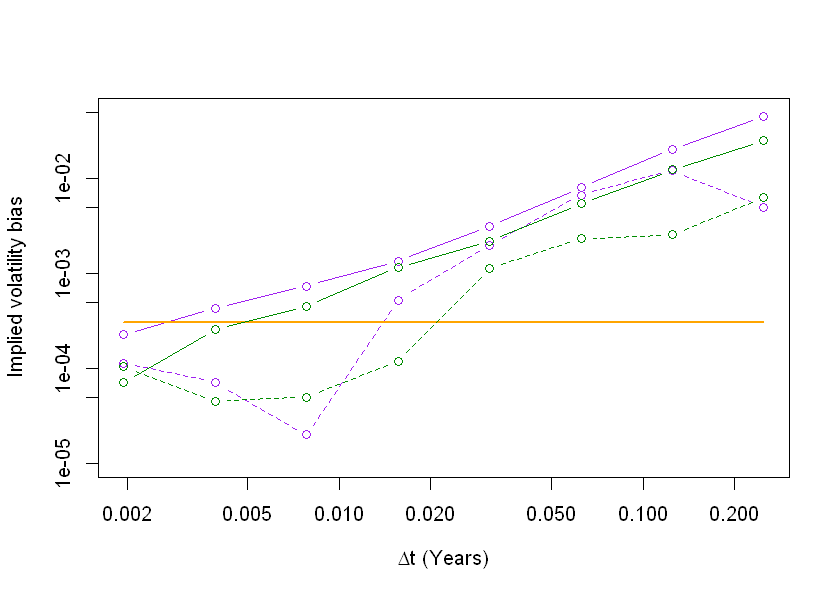

In [18]:
tmp <- resF.BCC2
sdThreshold <- mean(tmp$twoSd)
plot(1/tmp$Steps,abs(tmp$bias),type="b",log="xy",col="purple",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="purple",lty=2)
curve(sdThreshold+x*0,from=1/512, to=1/4,add=T,col="orange",lwd=2)
tmp <- resFAndersen.BCC2
lines(1/tmp$Steps,abs(tmp$bias),type="b",col="green4",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="green4",lty=2)

Figure 4: Euler with full truncation in purple; with Andersen $x$-discretization in green; dashed lines are with Richardson extrapolation ($K=1.2$; $T=1$)

* Andersen's discretization is better, and Richardson extrapolation improves it.

### The Alfonsi Heston scheme

[Alfonsi (2010)]<sup id="cite_ref-Alfonsi:2010" class="reference"><a href="#cite_note-Alfonsi:2010"><span>[</span>1<span>]</span></a></sup> implements the following scheme for variance:

<a name="eq:Alfonsi2010"></a>(6)
\begin{eqnarray}
&& v_{t+\Delta}\\&=&e^{-\lambda\,\Delta/2}\,\left(\sqrt{v_t\,e^{-\lambda\,\Delta/2}+\left[\lambda \,\bar v-\frac{\eta^2}{4}\right]\,\psi\left(\frac{\Delta}{2}\right)}
+\frac{\eta}{2}\,\sqrt{\Delta}\,Z
\right)^2\nonumber\\
&&\quad\quad\quad+\left[\lambda \,\bar v-\frac{\eta^2}{4}\right]\,\psi\left(\frac{\Delta}{2}\right)
\end{eqnarray}
with $Z \sim N(0,1)$ and 

$$
\psi(x):=\frac{1-e^{-\lambda x}}{\lambda}
$$

Note in particular that $v_{t+\Delta}>0$ if $4\,\lambda\,\bar v > \eta^2$.  So the discretized variance process cannot hit zero with BCC or BCC1 parameters.

### Alfonsi (2010) code

In [19]:
evolveAlfonsi <- function(v,x,dt,W1,W2,L=NULL){

        eldt2 <- exp(-lambda*dt/2);

        #Variance process
        vbarp <- vbar - eta^2/(4*lambda);
        psi <- (1-eldt2)/lambda;
        v1 <- v*eldt2 + lambda*vbarp*psi;
        v2 <- (v1 > 0) * v1; # Take v2 = 0 if v1<0, else v2=v1
        par <- sqrt(v2) + eta/2*sqrt(dt)*W2;
        vf <- eldt2*par*par + lambda*vbarp*psi;

        # Log-stock process (Andersen equation (33))
        vvf <- (v+vf > 0) * (v+vf);
        dw <- vvf/2*dt;
        x <- x  - dw/2 + rho2m1*sqrt(dw)*W1 +
            rho/eta*(lambda*dw + vf-v -lambda*vbar*dt) ;
        # Impose martingale constraint
        x <- x - log(mean(exp(x)));
        v <- vf;
        return(cbind(x,v));
}

Here's Monte Carlo code that uses the above time step:

In [20]:
HestonMC2 <- function(params){
    
    is.even <- function(j){as.logical((j+1) %% 2)}
    
    res <- function(S0, T, AK, N, m, evolve,exactVols=NULL)
    {
  
    lambda <<- params$lambda;
    rho <<- params$rho;
    eta <<- params$eta;
    vbar <<- params$vbar;
    v0 <<- params$v;
  
    n <- m*2; #n is number of timesteps = 2*m so we can use Romberg extrapolation
    sqrt2 <- sqrt(2);
    rho2m1 <<- sqrt(1-rho*rho);
    vbarp <<- vbar - eta^2/(4*lambda);
    
    negCount <- 0;
    
    # We use a vertical array, one element per M.C. path
    x <- rep(0,N); v <- rep(1,N)*v0;
    xm <- x; vm <- v;
    W1m <- rep(0,N); W2m <- rep(0,N); 
  
    # Loop for bias computation (N small, n big)
    for (i in 1:n)
    {
        # Two sets of correlated normal random vars.
        
        W1 <- rnorm(N);
        W2 <- rnorm(N);
        W1 <- W1 - mean(W1); W1 <- W1/sd(W1);
        W2 <- W2 - mean(W2); W2 <- W2/sd(W2);
        # Now W1 and W2 are forced to have mean=0 and sd=1
        
        W2p <- W2 - cor(W1,W2)*W1; # Eliminate actual correlation
        W2p <- W2p - mean(W2p); W2 <- W2p/sd(W2p); 
        # Now W1 and W2 have mean=0, sd=1 and correlation=0
        
        L <- rbinom(N, size=1, prob=1/2); # Bernoulli rv for NV step
    
        # Add code for subgrid
        W1m <- W1m + W1/sqrt2; W2m <- W2m + W2/sqrt2; # N(0,1) rv's for subgrid
       
        if (is.even(i)) {
            #print(c(i,mean(W1m),mean(W2m),sd(W1m),sd(W2m),cor(W1m,W2m)));
            resm <- evolve(vm,xm,T/m,W1m,W2m,L);
            xm <- resm[,1];
            vm <- resm[,2];
            W1m <- rep(0,N); W2m <- rep(0,N);
        }
    
        res <- evolve(v,x,T/n,W1,W2,L);
        x <- res[,1];
        v <- res[,2];
        negCount <- negCount +mean(v<0)/n; #Probability of negative variance per path per timestep
    
  }

    S <- S0*exp(x);
    Sm <- S0*exp(xm);

    # Now we have three vectors of final stock prices
  
    M <- length(AK);
    AV <- numeric(M); AVdev <- numeric(M);
    BSV <- numeric(M); BSVH <- numeric(M); BSVL <- numeric(M);
    iv2SD <- numeric(M); bias <- numeric(M);
    AVm <- numeric(M); AVmdev <- numeric(M);
    BSVm <- numeric(M); BSVHm <- numeric(M); BSVLm <- numeric(M);
    iv2SDm <- numeric(M);
    AV1 <- numeric(M); AV1dev <- numeric(M);
    BSV1 <- numeric(M); BSVH1 <- numeric(M); BSVL1 <- numeric(M);
    iv2SDrom <- numeric(M);biasRom <- numeric(M);
  
  # Evaluate mean call value for each path
  for (i in 1:M)
  {
    # 2*m timesteps
    K <- AK[i];
    V <- (S>K)*(S - K); # Boundary condition for European call
    AV[i] <- mean(V);
    AVdev[i] <- sqrt(var(V)/length(V));  
    
    BSV[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i]);
    BSVL[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] - AVdev[i]);
    BSVH[i] <- BSImpliedVolCall(S0, K, T, 0, AV[i] + AVdev[i]);
    iv2SD[i] <- (BSVH[i]-BSVL[i]);
    
    # m timesteps
    Vm <- (Sm>K)*(Sm - K); # Boundary condition for European call
    AVm[i] <- mean(Vm);
    AVmdev[i] <- sd(Vm) / sqrt(N);
    BSVm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i]);
    BSVLm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] - AVmdev[i]);
    BSVHm[i] <- BSImpliedVolCall(S0, K, T, 0, AVm[i] + AVmdev[i]);
    iv2SDm[i] <- (BSVH[i]-BSVL[i]);
    
    # Richardson extrapolation estimates 
    V1 <- 2*V - Vm;
    AV1[i] <- mean(V1);
    AV1dev[i] <- sd(V1) / sqrt(N);
    BSV1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i]);
    BSVL1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] - AV1dev[i]);
    BSVH1[i] <- BSImpliedVolCall(S0, K, T, 0, AV1[i] + AV1dev[i]);
    iv2SDrom[i] <- (BSVH1[i]-BSVL1[i]);
    
    if(!is.null(exactVols)) {bias <- BSV-exactVols};
    if(!is.null(exactVols)) {biasRom <- BSV1-exactVols};
  }
  
  
  l.AK <- length(AK)      
  data.out <- data.frame(AK,rep(N,l.AK),rep(2*m,l.AK),BSV,bias,iv2SD,BSVm,BSV1,biasRom,iv2SDrom) 
  names(data.out) <- c("Strikes","Paths","Steps","ivol","bias","twoSd","ivolm", "ivolRichardson", "biasRichardson","twoSdRichardson") 
  return(data.out) 
  
  
}
return(res)
}

Here's an example of how to call the code:

In [21]:
HestonMC2(paramsBCC)(S0=1, T=1, AK=strikes, N=1000000, m=4, evolve=evolveAlfonsi, exactVols=exactHestonVolsBCC) 

Strikes Paths Steps ivol      bias          twoSd        ivolm    
1 0.8     1e+06 8     0.2286438 -0.0003518999 0.0013884503 0.2281540
2 1.0     1e+06 8     0.1815212 -0.0002069074 0.0004931474 0.1812450
3 1.2     1e+06 8     0.1519196 -0.0001281308 0.0003556276 0.1520906
  ivolRichardson biasRichardson twoSdRichardson
1 0.2291327       1.369392e-04  0.0014290170   
2 0.1817975       6.932751e-05  0.0005163264   
3 0.1517483      -2.994116e-04  0.0003827734

### Convergence of the Alfonsi scheme with BCC parameters

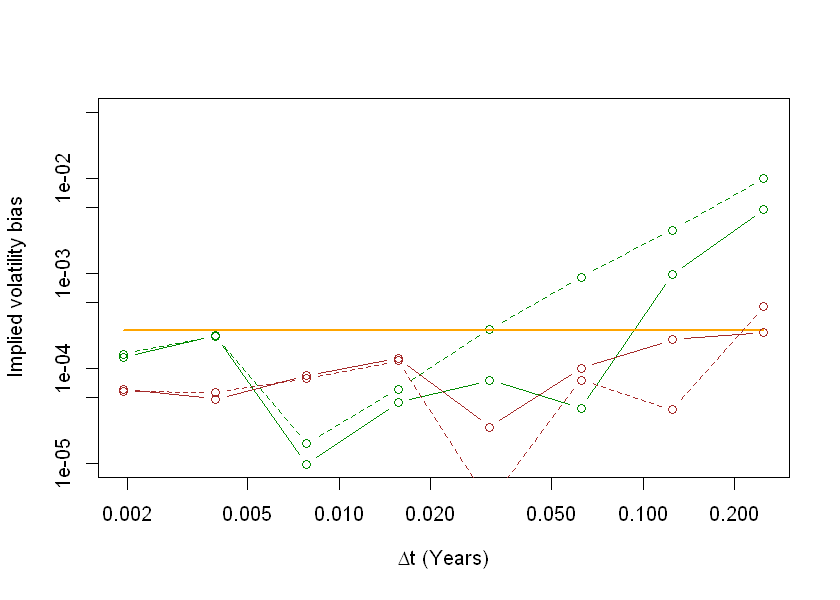

In [22]:
tmp <- resFAndersen.BCC
sdThreshold <- mean(tmp$twoSd)
plot(1/tmp$Steps,abs(tmp$bias),type="b",log="xy",col="green4",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="green4",lty=2)
curve(sdThreshold+x*0,from=1/512, to=1/4,add=T,col="orange",lwd=2)
tmp <- resAlfonsi.BCC
lines(1/tmp$Steps,abs(tmp$bias),type="b",col="brown",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="brown",lty=2)

Figure 5: Euler with full truncation and Andersen $x$-discretization in green; Alfonsi in brown; dashed lines are with Richardson extrapolation ($T=1$, $K=1.2$)

### Convergence of the Alfonsi scheme with BCC2 parameters

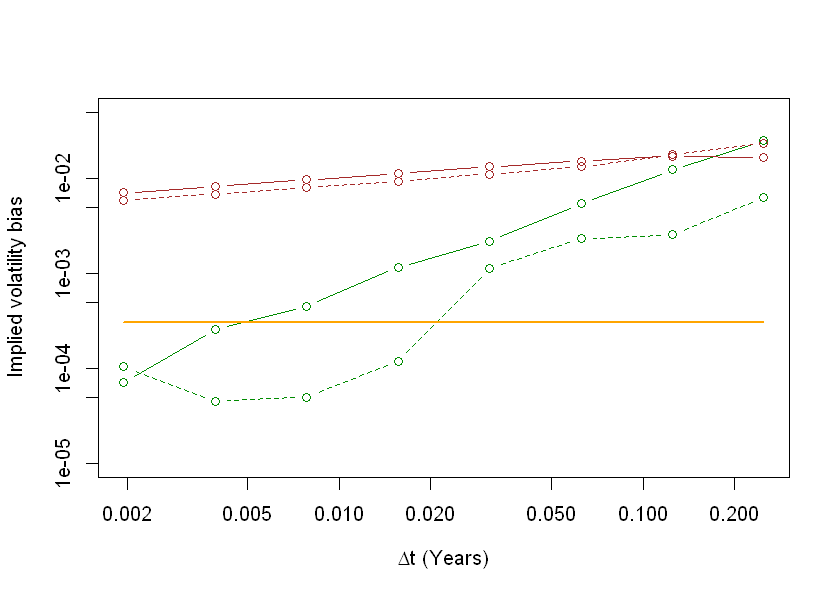

In [23]:
tmp <- resFAndersen.BCC2
sdThreshold <- mean(tmp$twoSd)
plot(1/tmp$Steps,abs(tmp$bias),type="b",log="xy",col="green4",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="green4",lty=2)
curve(sdThreshold+x*0,from=1/512, to=1/4,add=T,col="orange",lwd=2)
tmp <- resAlfonsi.BCC2
lines(1/tmp$Steps,abs(tmp$bias),type="b",col="brown",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="brown",lty=2)

Figure 6: Euler with full truncation and Andersen $x$-discretization in green; Alfonsi in brown; dashed lines are with Richardson extrapolation ($T=1$, $K=1.2$)

* Now Alfonsi is underperforming.

### Alfonsi code with Andersen trick

In [24]:
evolveAlfonsiF <- function(v,x,dt,W1,W2,L=NULL){

        eldt2 <- exp(-lambda*dt/2);

        #Variance process
        vbarp <- vbar - eta^2/(4*lambda);
        psi <- (1-eldt2)/lambda;
        v1 <- v*eldt2+lambda*vbarp*psi;
        v2 <- (v1 > 0) * v1; # Take v2 = 0 if v1<0, else v2=v1
        par <- sqrt(v2) + eta/2 * sqrt(dt)*W2;
        vf <- eldt2*par*par +lambda*vbarp*psi + v1 - v2;
                                # Full truncation

        # Log-stock process (Andersen equation (33))
        vvf <- (v+vf > 0) * (v+vf);
        dw <- vvf/2*dt;
        x <- x  - dw/2 + rho2m1*sqrt(dw)*W1 +
            rho/eta*(lambda*dw + vf-v -lambda*vbar*dt) ;
        # Impose martingale constraint
        x <- x - log(mean(exp(x)));
        v <- vf;
        return(cbind(x,v));
}

Once again, here's how to run the code:

In [25]:
HestonMC2(paramsBCC)(S0=1, T=1, AK=strikes, N=1000000, m=4, evolve=evolveAlfonsiF, exactVols=exactHestonVolsBCC) 

Strikes Paths Steps ivol      bias          twoSd        ivolm    
1 0.8     1e+06 8     0.2288055 -0.0001902132 0.0013882511 0.2283923
2 1.0     1e+06 8     0.1816118 -0.0001163415 0.0004937795 0.1812673
3 1.2     1e+06 8     0.1521840  0.0001362294 0.0003554202 0.1523776
  ivolRichardson biasRichardson twoSdRichardson
1 0.2292181       2.223445e-04  0.0014292912   
2 0.1819563       2.281701e-04  0.0005169019   
3 0.1519901      -5.770984e-05  0.0003828855

### Convergence of Alfonsi scheme with full truncation and BCC2 parameters


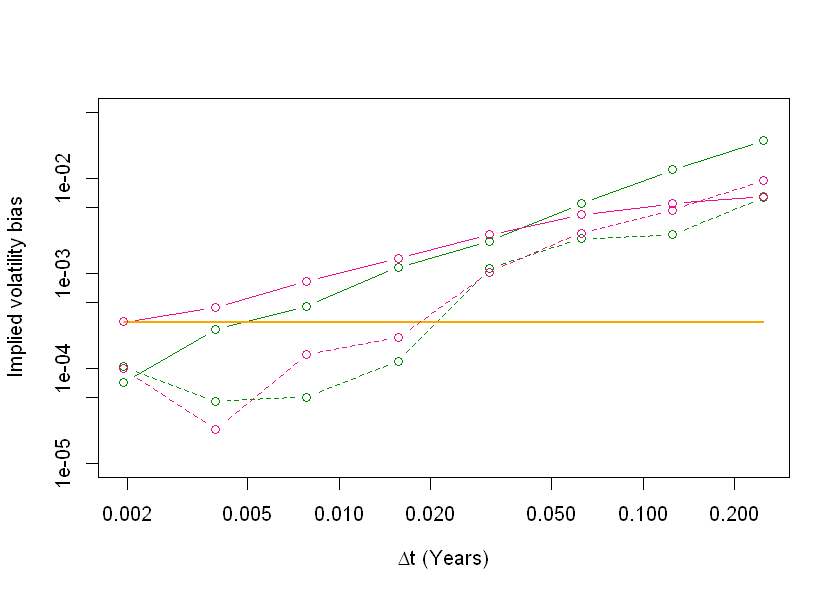

In [26]:
tmp <- resFAndersen.BCC2
sdThreshold <- mean(tmp$twoSd)
plot(1/tmp$Steps,abs(tmp$bias),type="b",log="xy",col="green4",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="green4",lty=2)
curve(sdThreshold+x*0,from=1/512, to=1/4,add=T,col="orange",lwd=2)
tmp <- resAlfonsiF.BCC2
lines(1/tmp$Steps,abs(tmp$bias),type="b",col="deeppink2",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="deeppink2",lty=2)

Figure 7: Euler with full truncation and Andersen $x$-discretization in green; Alfonsi with full truncation in pink; dashed lines are with Richardson extrapolation ($T=1$, $K=1.2$)

* Now the problem with Alfonsi is fixed!

### Convergence of moments

Recall from Lecture 3 that in the Heston model,

$$
\hat v_{t+\Delta}:=\mathbb{E}\left[v_{t+\Delta}|v_t\right]=\bar v+(v_t-\bar v)\,e^{-\lambda\,\Delta}
$$

and

$$
\begin{eqnarray}
\Var\left[v_{t+\Delta}|v_t\right]&=&\int_t^{t+\Delta}\,e^{-2\,\lambda\,(T-t)}\,\eta^2\,\hat v_s\,dt\\
&=&\frac{\eta ^2}{\lambda}\,  \left(1-e^{- \lambda\,\Delta }\right) \left[ e^{- \lambda\,\Delta }\,v_t+
\frac{1}{2} \left(1-e^{- \lambda\,\Delta }\right)\,\bar v
  \right]
\end{eqnarray}
$$

We can show that if $\tilde v$ denotes the Alfonsi (2010) discretization [(4)](#eq:Alfonsi2010), we have

$$
\mathbb{E}[\tilde v_{t+\Delta}|v_t]=\mathbb{E}[ v_{t+\Delta}|v_t]+\mathcal{O}(\Delta^3)
$$

and

$$
\Var[\tilde v_{t+\Delta}|v_t]=\Var[ v_{t+\Delta}|v_t]+\mathcal{O}(\Delta^3)
$$

### Richardson extrapolation again

Suppose now that our scheme has order 2 weak convergence and so generates an estimate of the true value of a claim as follows:

$$
\mathbb{E}\left[g(\hat X_T)\right]=\mathbb{E}\left[g(X_T)\right]+c\,\Delta^2  + \mathcal{O}(\Delta^3)
$$
where $\hat X$ is the discretization.



Then we have

$$
4\,\mathbb{E}\left[g\left(\hat X^{\Delta}_T\right)\right]-\mathbb{E}\left[ g\left(\hat X^{2\,\Delta}_T\right)\right]=3\,\mathbb{E}\left[g(X_T)\right] + \mathcal{O}(\Delta^3)
$$

* Convergence does look quadratic for our Euler discretizations with BCC parameters so Richardson extrapolation might work in this case.

* However, convergence seems to be sublinear in the BCC2 case, and quadratic Richardson will not work there.

### Explaining the Alfonsi scheme

* How could Alfonsi have been so smart as to pick this particular discretization where errors cancel to $\mathcal{O}(\Delta^2)$?

    * Answer: He implemented a scheme due to Ninomiya and Victoir (NV).

* [Ninomiya and Victoir]<sup id="cite_ref-NinomiyaVictoir" class="reference"><a href="#cite_note-NinomiyaVictoir">[8]</a></sup> showed in complete generality that their scheme  has second order weak convergence.

    * In particular, the mean and variance of the discretized process must be accurate to second order in the timestep.
    * Alfonsi uses NV discretization only for the variance process.
    
<!--
####Intuition for the NV solution

The following slides are for interest only, and understanding of the contents will not be tested; neither in the homework assignments nor in the final exam.
-->

### Operator splitting


* Suppose we have two operators (matrices $A_1$ and $A_2$ say) that don't commute in general.

* Write the solution to the ODE

    $$
    \frac{d x}{dt}=A\,x
    $$

    as
    $$
    x(t)=e^{A\,t}\,x(0).
    $$

* Now split the operator as $A=A_1+A_2$.  Then

$$
e^{A\,t}\,x(0) \neq e^{A_1\,t}\,e^{A_2\,t}\,x(0)
$$

### The Baker-Campbell-Hausdorff formula

From Wikipedia, the Baker-Campbell-Hausdorff formula is the solution to

$$
Z=\log{e^{X}\,e^{Y}}
$$
for noncommutative ${X}$ and ${Y}$.


$$
Z=X+Y+\frac12[X,Y]+\frac1{12}[X,[X,Y]]-\frac{1}{12}[Y,[X,Y]]+...
$$

### The Ninomiya-Victoir (NV) scheme

Suppose we are given a problem of the form

<a name="eq:diffusion"></a>(7)
\begin{equation}
\partial_t f+\left\{V_0+\frac12 \sum_{i=1}^nV_i^2\right\} f=0
\end{equation}

(the diffusion equation for example) where the $V_i$ are first order differential operators.
<!--  and $\tau=T-t$.-->

<!--
If we could solve this equation, the solution could be written formally as
$$
f({\bf x},t)=e^{\mathcal{L}\,t}\,f({\bf x}_0,0)
$$
where $\bf x$ is the state vector.  Suppose now we find a way to write $\cL^2$ as $\cL^2=V_0+V_1+...+V_n$ where each of the $V_i$ is a first order differential operator.
-->

Then, according to [Ninomiya and Victoir]<sup id="cite_ref-NinomiyaVictoir" class="reference"><a href="#cite_note-NinomiyaVictoir"><span>[</span>4<span>]</span></a></sup>, a second order weak solution is given by simulation with a step

$$
{\bf x}_{t+\Delta}=\left\{
\begin{array}{ll}
e^{V_0\,\Delta/2} \,e^{V_1\,\sqrt{\Delta}\,Z_1} \,e^{V_2\,\sqrt{\Delta}\,Z_2}\,...\,e^{V_n\,\sqrt{\Delta}\,Z_n}\,e^{V_0\,\Delta/2}\,{\bf x}_t & \text{ if }\Lambda_t =1 \\
e^{V_0\,\Delta/2} \,e^{V_n\,\sqrt{\Delta}\,Z_n}\,...\,\,e^{V_2\,\sqrt{\Delta}\,Z_2} \,e^{V_1\,\sqrt{\Delta}\,Z_1}\,e^{V_0\,\Delta/2} \,{\bf x}_t  & \text{ if }\Lambda_t =0
\end{array}
\right.
$$

where the $Z_i$ are independent $N(0,1)$ random variables, and $\Lambda_t$ is a Bernoulli random variable with $p=1/2$.

* This looks like a mixture of Strang splitting and Symmetrically Weighted Sequential Splitting (SWSS).

### Splitting methods

Consider the initial value problem

<a name="eq:ODE"></a>(8)
\begin{equation}
\frac{dx}{dt}= (A_1+A_2)\,x
\end{equation}

where $A_1$ and $A_2$ are differential operators.

* The true solution to [(8)](#eq:ODE) over some small interval $\Delta$ is

$$
x(t+\Delta) = e^{(A_1+A_2)\,\Delta}\,x(t).
$$

* *Strang splitting* is the approximation 

$$
x(t+\Delta) \approx e^{A_1\,\Delta/2}\,e^{A_2\,\Delta}\,e^{A_1\,\Delta/2}\,x(t).
$$

* *SWSS splitting* is the approximation

$$
x(t+\Delta) \approx \frac 12 \,\left\{e^{A_1\,\Delta}\,e^{A_2\,\Delta} + e^{A_2\,\Delta}\,e^{A_1\,\Delta}\right\}\,x(t).
$$

* Both of these splitting methods have errors of order $\Delta^3$.

### Cubature on Wiener space of degree 3

* *Cubature on Wiener space* of degree 3 discretizes the process 
$$
dx_t = \mu(x,t)\,dt + \sigma(x,t)\,dZ_t
$$
as 

<a name="eq:cubature"></a>(9)
\begin{equation}
x_{s+\Delta} = \exp\left\{  \Delta\,V_0 + \sqrt{\Delta}\,Y_{s}\, V_1 \right\} x_s
\end{equation}

where

$$
V_0 = \mu(x,t)\,\partial_x;\, V_1 = \sigma(x,t)\,\partial_x; Y_s \sim  N(0,1).
$$

* Here, an expression of the form 
<p>
$$
x_{s+\Delta} = \exp\left\{  \sqrt{\Delta}\,Y_{s}\, V_1 \right\} x_s
$$
<p>
is understood as a solution of the ODE
<p>
$$
dx_t = V_1 x_t\,dt
$$
<p>
computed at the random time $\sqrt{\Delta}\,Y_s$.

### Relationship to Euler-Maruyama

* Taylor expanding the exponential in [(9)](#eq:cubature):

    $$
    x_{s+\Delta} = \exp\left\{  \Delta\,V_0 + \sqrt{\Delta}\,Y_{s}\, V_1 \right\} x_s
    $$
    to first order gives

    \begin{eqnarray}
    x_{s+\Delta} &=&x_s + \left\{  \Delta\,V_0 + \sqrt{\Delta}\,Y_{s}\, V_1 \right\} x_s
    =x_s + \mu\, \Delta+ \sigma\,\sqrt{\Delta}\,Y_{s}
    \end{eqnarray}

    which is just the Euler-Maruyama scheme again.


* The point is that an exact solution of [(7)](#eq:cubature) or a better approximation to [(7)](#eq:cubature) may lead to better convergence.

* The ODEs in each step may be solved exactly (if lucky or smart) or numerically using a Runge-Kutta scheme for example.
    
    * Again, MC or QMC methods would be used in practice to compute the expectation.

### Summary of the cubature method

* Write the backward equation for the claim to be valued in the form

    $$
     \partial_ t f(S, t) +\mathcal{L} f(S,t) =0
    $$
    
    with $f(S_T,T) = g(S_T)$ where
    
    $$
    \mathcal{L}=V_0 + \frac 12 \sum_i {V_i}^2 
    $$
    
    is the infinitesimal generator of the Itô diffusion.

* Then

    $$
    f(S,t) = \mathbb{E}_t\left[g(S_T)\right]
    $$

    where $S_T$ is obtained as the ODE solution

    $$
    S_T = \exp\left\{(T-t)\,V_0 + \sum_i \sqrt{T-t}\, Z_i V_i\right\} S.
    $$

### Example: The Bachelier model

* The Bachelier SDE is

$$
dS_t=\sigma\,dZ_t.
$$

* The corresponding backward equation is

    $$
    \partial_ t f(S, t) + \frac{\sigma^2}2 \partial_{S,S}f(S, t)=0 =: \partial_ t f(S, t) +\frac12\,V_1^2\,f(S, t)=0  
    $$

    with $V_1= \sigma\,\partial_S$.


* Applying Feynman-Kac, the value of an option is given by $\mathbb{E}\left[g(S_T)\right]$ for some payoff function $g(\cdot)$.

### Solution using cubature on Wiener space

* Using cubature, $\mathbb{E}\left[g(S_T)\right]$ may be approximated as an average over the

    $$
    S_T= e^{\sqrt{T-t}\,Y\,V_1} S(t).
    $$

    The $S_T$ are solutions of the ODE

    $$
    \frac{d}{du} S(u) = V_1 S(u) = \sigma \partial_S S(u) =\sigma
    $$

    evaluated at the random times $u=\sqrt{T-t}\,Y$ where the law of $Y$ is some approximation to the law of $Z \sim N(0,1)$.

* The solution is of course just
$
S_T = S_t+ \sigma\,\sqrt{T-t}\,Y
$
so that

$$
f(S,t)= \mathbb{E}\left[g(S_t + \sigma\,\sqrt{T-t}\,Y)\right].
$$

### Solution for European call option

* If $g(S_T) = (S_T-K)^+$, we obtain
    <br><br>$$
    C(S,t)=\mathbb{E}\left[ (S_T-K)^+  \right]= \mathbb{E}\left[ (S+\sigma\,\sqrt{T-t}\,Y -K)^+  \right].
    $$<br>
    where $Y$ could be for example binomial.
    
    * Recall that cubature in finite dimensions involves picking points and weights to as to integrate exactly some functions of chosen form (such as polynomials up to some order or Gaussians).


* Note that we don't need cubature to compute the RHS; the expectation may be computed explicitly  in this case.

### Intuition for Ninomiya-Victoir: Feynman-Kac

<!--
For concreteness, consider only the Heston variance process $v_t$.  
-->

The solution of [(7)](#eq:diffusion):

$$
\partial_t f + \left\{V_0+\frac12 \sum_{i=1}^nV_i^2\right\} f =0
$$

with $f(x_T,T)=g(x_T)$ may be written formally as
$
f(x,t)=\mathbb{E}\left[g(x_T)\right]
$
where 

\begin{eqnarray}
x_T&=&\exp\left\{V_0\,(T-t)+\sum_i V_i\,\sqrt{T-t}\,Z_i \right\}x\\
&\approx & \prod_{j=1}^n\,\exp\left\{V_0\,\Delta+\sum_i V_i\,\sqrt{\Delta}\,Z_{ij} \right\}x
\end{eqnarray}

where $n$ is the number of time steps, and $\Delta=(T-t)/n$.

* The Ninomiya-Victoir scheme involves evaluating the solutions of ODEs over deterministic and random time intervals $\Delta$ and $\sqrt{\Delta}\,Z_{ij}$ respectively.

### Intuition for Ninomiya-Victoir: Splitting

Consider two non-commuting operators (or matrices) $A$ and $B$.  Then

$$
(A+B)(A+B)=A^2+A\,B+B\,A+B^2
$$

and

$$
e^{(A+B)\,\Delta}=\frac{1}{2}\,\left[e^{A\,\Delta}\,e^{B\,\Delta}+e^{B\,\Delta}\,e^{A\,\Delta} \right]+ \mathcal{O}(\Delta^3)
$$

\begin{eqnarray}
\mbox{LHS}&=&1+(A+B)\,\Delta+\frac{1}{2}(A+B)^2\,\Delta^2+\mathcal{O}(\Delta^3)\\
\mbox{RHS}&=&1+(A+B)\,\Delta+\frac{1}{2}\,A^2\,\Delta^2+\frac{1}{2}\,B^2\,\Delta^2\\
&&\quad\quad\quad\quad+\frac12\,\left(A\,B+B\,A\right)\,\Delta^2+\mathcal{O}(\Delta^3)
\end{eqnarray}

Similarly

$$
e^{(A+B)\,\Delta}=e^{A\,\Delta/2}\,e^{B\,\Delta}\,e^{A\,\Delta/2} + \mathcal{O}(\Delta^3)
$$

### Intuition for Ninomiya-Victoir: Randomization

* Randomization in the Ninomiya-Victoir (NV scheme) has the effect of ensuring that pairs of operators appear in forward and reverse orders.

   * Expanding the expectation gives terms like
<br><br>\begin{eqnarray}
&&\mathbb{E}\left[\left(\Lambda\, V_i^2\,V_j^2\,\Delta^2+(1-\Lambda)\, V_j^2\,V_i^2\,\Delta^2\right)\bf x_t\right]\\
&=&\frac 12 \,\mathbb{E}\left[\left(V_i^2\,V_j^2\,\Delta^2+ V_j^2\,V_i^2\,\Delta^2\right)\,\bf x_t\right]
\end{eqnarray}<br>
 

  * To order $\Delta^2$, this gives agreement with the expansion of $e^{\frac 12 V_i^2\,\Delta+\frac 12 V_j^2\,\Delta}\,{\bf x}_t$.
   * Higher order terms such as $V_i^2\,V_j^2\,V_k^2\,\Delta^3$ also appear in forward and reverse orders but this is not consistent with the expansion of $e^{\frac 12 V_i^2\,\Delta+\frac 12 V_j^2\,\Delta+\frac 12 V_k^2\,\Delta}\,{\bf x}_t$.

* It may be explicitly checked that the scheme is second order.

### Example: The Heston variance process

The Heston variance SDE reads

$$
dv=-\lambda\,(v-\bar v)\,dt+\eta\,\sqrt{v} \, dZ
$$

Applying Itô's Lemma, functions $f(v,t)$ satisfy the equation

\begin{eqnarray}
\frac{df}{dt}&=&-\lambda(v-\bar v)\,\partial_v f+\frac{\eta^2}{2}\,v\,\partial_{v,v}f\\
&=&\left(V_0+\frac{1}{2}\,{V_1}^2\right)f(v,t)
\end{eqnarray}

and
$
V_0=\left[-\lambda\,(v-\bar v)-\eta^2/4\right]\partial_v;\,\,V_1=\eta\,\sqrt{v}\,\partial_v.
$

### Example: The Heston variance process


Now choose $f(v,t)=v$.  Then $e^{V_0\,\Delta}v(0)$ is the solution of the ODE

$$
\frac{ dv}{dt}=V_0 v=\left[-\lambda\,(v-\bar v)-\eta^2/4\right]\partial_v v=-\lambda\,(v-\bar v)-\eta^2/4
$$

which is

$$
v(t)=\bar v'+(v_0-\bar v')\,e^{-\lambda\,\Delta}
$$

where

$$
\bar v'=\frac{\lambda\, \bar v-\eta^2/4}{\lambda}.
$$

Likewise,  $e^{V_1\,\sqrt{\Delta}\,Z}v(0)$ is the solution of the ODE

$$
\frac{ dv}{ds}=V_1 v=\eta\,\sqrt{v}
$$

evaluated at the time $s=\sqrt{\Delta}\,Z$ which is

$$
e^{V_1\,\sqrt{t}\,Z}v(0)=\left(\sqrt{v_0}+\frac{\eta}{2}\,\sqrt{\Delta}\,Z\right)^2.
$$

### The Heston variance process: A NV timestep

One NV timestep of length $\Delta$ is then evaluated as follows:

1. <br>$$
v_1:=e^{V_0\,\Delta/2}v_t=\bar v'+(v_t-\bar v')\,e^{-\lambda\,\Delta/2}
$$<br>

2. <br>$$
v_2:=e^{V_1\,\sqrt{\Delta}\,Z}v_1=\left(\sqrt{\bar v'+(v_t-\bar v')\,e^{-\lambda\,\Delta/2}}+\frac{\eta}{2}\,\sqrt{\Delta}\,Z\right)^2
$$<br>

3. <br><a name="eq:alfonsiStep2"></a>(10)\begin{eqnarray}
v_{t+\Delta}&=&e^{V_0\,\Delta/2}v_2=\bar v'+(\bar v'-v_2)\,e^{-\lambda\,\Delta/2}\nonumber\\
&=&\bar v'+\left[\left(\sqrt{\bar v'+(v_t-\bar v')\,e^{-\lambda\,\Delta/2}}+\frac{\eta}{2}\,\sqrt{\Delta}\,Z\right)^2-\bar v'
\right]\,e^{-\lambda\,\Delta/2}\nonumber
\end{eqnarray}<br>

It is easy to show that [(6)](#eq:Alfonsi2010) and [(10)](#eq:alfonsiStep2) are equivalent.

### The Heston SDE again

The Heston SDE may be written in the form

\begin{eqnarray}
dx&=&-\frac{v}{2}\,dt+\sqrt{v}\,\,dZ\\
dv&=&-\lambda\,(v-\bar v)\,dt+\eta\,\sqrt{v}\,\left\{\rho\,dZ+\sqrt{1-\rho^2}\,dZ^\perp\right\}
\end{eqnarray}

Applying Itô's Lemma as before, functions $f(x,v,t)$ satisfy the equation

$$
\frac{df}{dt}+\mathcal{L} f = 0
$$

with

$$
\mathcal{L} f=-\frac{1}{2}\,v\,\partial_x f-\lambda(v-\bar v)\,\partial_v f+\frac12 \,v \,\partial_{x,x} f \\+\rho\,\eta\,v\,\partial_{x,v}\,f
+\frac{\eta^2}{2}\,v\,\partial_{v,v}f.
$$

### Operator splitting again

$\mathcal{L}$ can be rewritten in the form

$$
\mathcal{L}=V_0+\frac{1}{2}\,V_1^2+\frac12\,V_2^2
$$

with

\begin{eqnarray}
V_0&=&\left[-\lambda\,(v-\bar v)-\frac{1}{4}\,\eta^2\right]\partial_v-\left(\frac12 \,v+\frac{1}{4}\,\rho\,\eta\right)\, \partial_x\\
V_1&=&\sqrt{v}\,\partial_x+\rho\,\eta\,\sqrt{v}\,\partial_v\\
V_2&=&\sqrt{1-\rho^2}\,\eta\,\sqrt{v}\,\partial_v.
\end{eqnarray}

The solution may be written formally as:

$$
f(x,v,t)=e^{\left\{V_0+\frac{1}{2}\,V_1^2+\frac12\,V_2^2\right\}\,t}f(x_0,v_0,0)
$$

### The Ninomiya-Victoir recipe again



Let $f(x,v,t)$ be the state vector
$\left(
\begin{array}{c}
x\\
v
\end{array}
\right)=:\bf x.
$



Then, according to Ninomiya-Victoir, a second order weak solution is given by simulating with the discretization:

$$
{\bf x}_{t+\Delta}=\left\{
\begin{array}{ll}
e^{V_0\,\Delta/2} \,e^{V_1\,\sqrt{\Delta}\,Z} \,e^{V_2\,\sqrt{\Delta}\,Z^\perp}\,e^{V_0\,\Delta/2}\,{\bf x}_t & \text{ if }\Lambda_t =1  \\
e^{V_0\,\Delta/2}\,e^{V_2\,\sqrt{\Delta}\,Z^\perp}\,e^{V_1\,\sqrt{\Delta}\,Z} \,e^{V_0\,\Delta/2} \,{\bf x}_t & \text{ if }\Lambda_t =0
\end{array}
\right.
$$

where $\Lambda_t$ is a Bernoulli random variable with probability $1/2$,and $Z$ and $Z^\perp$ are independent $N(0,1)$ random variables.

### The full Heston process: A NV timestep

The first set of ODEs to solve is

\begin{eqnarray}
\frac{dx}{dt}&=&-\frac v 2 -\frac{\rho\,\eta}{4}\\
\frac{dv}{dt}&=&-\lambda\,(v-\bar v)-\frac{1}{4}\,\eta^2
\end{eqnarray}

The solution gives the first operation in the NV timestep as follows:

1.
    <br>\begin{eqnarray}
    {\bf x}_1&:=&e^{V_0\,\Delta/2}{\bf x}_t=e^{V_0\,\Delta/2}\left(
    \begin{array}{c}
    x_t\\
    v_t
    \end{array}
    \right)\\
    &=&\left(\begin{array}{c}
    x_t-\left(\frac12 \,\bar v'+\frac{1}{4}\,\rho\,\eta\right)\,\Delta/2-\frac12\,(v_t-\bar v')\,\psi(\Delta/2)\\
    \bar v'+(v_t-\bar v')\,e^{-\lambda\,\Delta/2}
    \end{array}
    \right)\\&=:&\left(\begin{array}{c}  x_1 \\ v_1 \end{array}\right)
    \end{eqnarray}
    where
$$
    \psi(x)=\frac{1-e^{-\lambda\,x}}{\lambda}.
    $$

The second set of ODEs to solve is

\begin{eqnarray}
\frac{dx}{dt}&=&\sqrt{v}\\
\frac{dv}{dt}&=&\rho\,\eta\,\sqrt{v}
\end{eqnarray}

The solution gives the second operation in the NV timestep as follows:

2.
    <br>\begin{eqnarray}
    \left(\begin{array}{c}  x_2 \\ v_2 \end{array}\right)
    &=&e^{V_1\,\sqrt{\Delta}\,Z}\left(\begin{array}{c}  x_1 \\ v_1 \end{array}\right)\\
    &=&\left(\begin{array}{c}  x_1 +\frac{\left(\sqrt{v_1}+\frac12 \rho\,\eta\,\sqrt{\Delta} Z\right)_+^2-v_1}{\rho\,\eta}\,\sqrt{\Delta}\,Z\\
    \left(\sqrt{v_1}+\frac12 \rho\,\eta\,\sqrt{\Delta} Z\right)_+^2 \end{array}\right)
    \end{eqnarray}<br><br>

The third set of ODEs to solve is

\begin{eqnarray}
\frac{dv}{dt}=\sqrt{1-\rho^2}\,\eta\,\sqrt{v}
\end{eqnarray}<br>The solution gives the third operation in the NV timestep as follows:


3.
    <br>\begin{eqnarray}
    \left(\begin{array}{c}  x_3 \\ v_3 \end{array}\right)
    &=&e^{V_2\,\sqrt{\Delta}\,Z}\left(\begin{array}{c}  x_2 \\ v_2 \end{array}\right)\\
    &=&\left(\begin{array}{c}  x_2\\
    \left(\sqrt{v_2}+\frac12 \rho\,\eta\,\sqrt{\Delta} Z^\perp\right)_+^2 \end{array}\right)
    \end{eqnarray}

So that, if $\Lambda_t=1$,

4.
    \begin{eqnarray}
    {\bf x}_{t+\Delta}
    &=&e^{V_0\,\Delta/2}\left(\begin{array}{c}  x_3 \\ v_3 \end{array}\right)\\
    &=&\left(\begin{array}{c}
    x_3-\left(\frac12 \,\bar v'+\frac{1}{4}\,\rho\,\eta\right)\,\Delta/2-\frac12\,(v_3-\bar v')\,\psi(\Delta/2)\\
    \bar v'+(v_3-\bar v')\,e^{-\lambda\,\Delta/2}
    \end{array}
    \right)
    \end{eqnarray}

We follow the same procedure in reverse if $\Lambda=0$.

* Note that this scheme is somewhat more complicated than Andersen's, but shouldn't really take longer to run.

### Ninomiya-Victoir code

In [27]:
evolveNV <- function(v,x,dt,W1,W2,L){
        
        eldt2 <- exp(-lambda*dt/2)
        sqrtdt <- sqrt(dt)
        psi <- (1-exp(-lambda*dt/2))/lambda
        
            #Evolve x and v together forwards: L0-L1-L2-L0
            x1 <- x - (vbarp/2+rho*eta/4)*dt/2-(v-vbarp)/2*psi
            v1 <- vbarp + (v-vbarp)*eldt2
            
            par1 <- sqrt(v1) + rho*eta/2*sqrtdt*W1
            sqrtv2 <- (par1>0)*par1# Same choice as Friz et al.
            v2 <- sqrtv2*sqrtv2
            x2 <- x1+(v2-v1)/(rho*eta)
            
            x3 <- x2
            par1 <- sqrtv2 + rho2m1*eta/2*sqrtdt*W2
            sqrtv3 <- (par1>0)*par1 # Same choice as Friz et al.
            v3 <- sqrtv3*sqrtv3
        
            xfwd <- x3 - (vbarp/2+rho*eta/4)*dt/2-(v3-vbarp)/2*psi
            vfwd <- vbarp + (v3-vbarp)*eldt2
        
            #Evolve x and v together backwards:  L0-L2-L1-L0
            x1 <- x - (vbarp/2+rho*eta/4)*dt/2-(v-vbarp)/2*psi
            v1 <- vbarp + (v-vbarp)*eldt2
            
            x2 <- x1
            par1 <- sqrt(v1) + rho2m1*eta/2*sqrtdt*W2
            sqrtv2 <- (par1>0)*par1 # Same choice as Friz et al.
            v2 <- sqrtv2*sqrtv2
                    
            par1 <- sqrtv2 + rho*eta/2*sqrtdt*W1; 
            sqrtv3 <- (par1>0)*par1 # Same choice as Friz et al.
            v3 <- sqrtv3*sqrtv3
            x3 <- x2+(v3-v2)/(rho*eta)
            
            xbwd <- x3 - (vbarp/2+rho*eta/4)*dt/2-(v3-vbarp)/2*psi
            vbwd <- vbarp + (v3-vbarp)*eldt2
            
        xf <- xfwd*L + xbwd*(1-L) #Forwards if L=1 else backwards
        x <- xf - log(mean(exp(xf))) # Martingale constraint
        v <- vfwd*L + vbwd*(1-L) #Forwards if L=1 else backwards
        
        return(cbind(x,v))
}


And here's an example:

In [28]:
HestonMC2(paramsBCC)(S0=1, T=1, AK=strikes, N=1000000, m=4, evolve=evolveNV, exactVols=exactHestonVolsBCC) 

Strikes Paths Steps ivol      bias         twoSd        ivolm    
1 0.8     1e+06 8     0.2294277  0.000431942 0.0013813736 0.2302531
2 1.0     1e+06 8     0.1815600 -0.000168176 0.0004911350 0.1813054
3 1.2     1e+06 8     0.1510395 -0.001008300 0.0003596641 0.1505668
  ivolRichardson biasRichardson twoSdRichardson
1 0.2285995      -0.0003962431  0.0014850862   
2 0.1818145       0.0000863793  0.0005482598   
3 0.1515100      -0.0005377983  0.0004313691

### Convergence of Ninomya-Victoir with BCC parameters

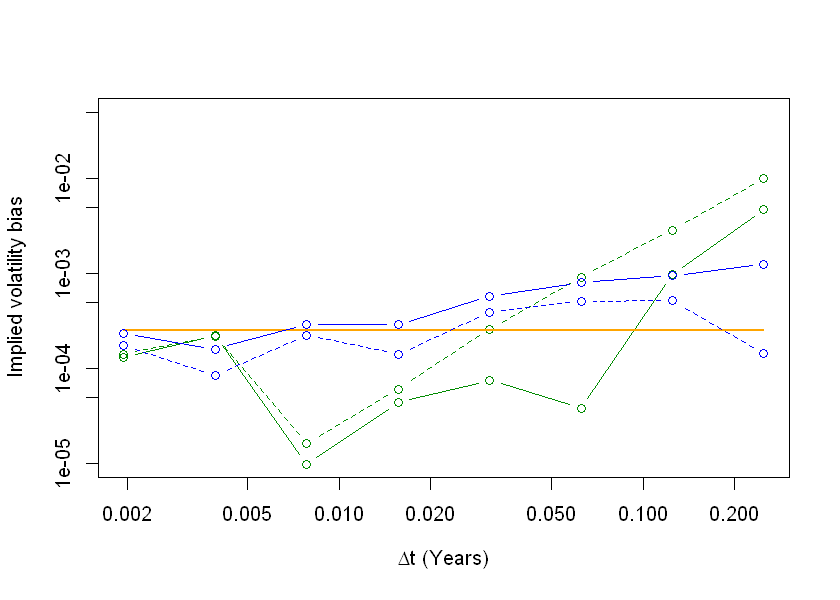

In [29]:
tmp <- resFAndersen.BCC
sdThreshold <- mean(tmp$twoSd)
plot(1/tmp$Steps,abs(tmp$bias),type="b",log="xy",col="green4",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="green4",lty=2)
curve(sdThreshold+x*0,from=1/512, to=1/4,add=T,col="orange",lwd=2)
tmp <- resNV.BCC
lines(1/tmp$Steps,abs(tmp$bias),type="b",col="blue",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
points(1/tmp$Steps,abs(tmp$biasRichardson),type="b",col="blue",lty=2)

Figure 8: Euler with full truncation and Andersen $x$-discretization in green; Ninomiya-Victoir in blue; dashed lines are with Richardson extrapolation ($T=1$, $K=1.2$)


* Let's leave the fixing of NV for future research...

### Summary convergence plot

Now we put results using all schemes so far on the same plot.

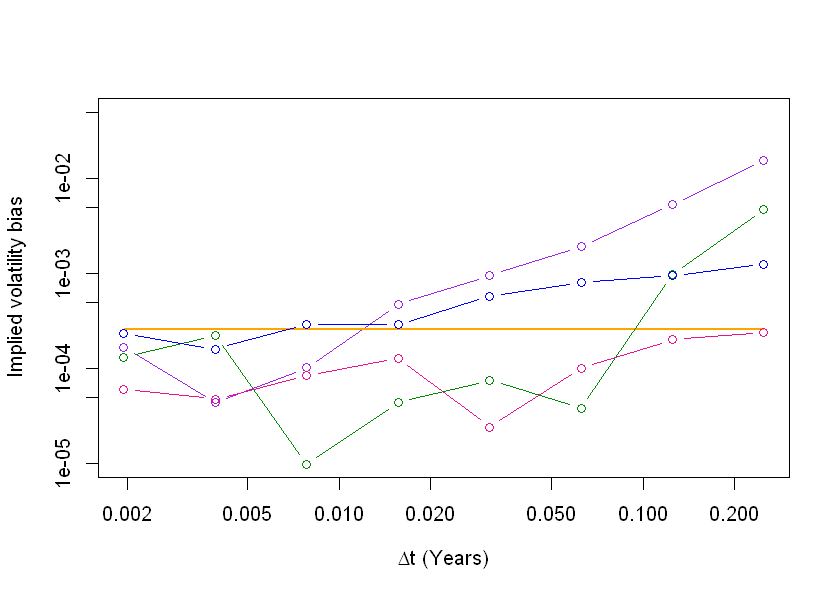

In [30]:
tmp <- resF.BCC
sdThreshold <- mean(tmp$twoSd)
plot(1/tmp$Steps,abs(tmp$bias),type="b",log="xy",col="purple",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))
curve(sdThreshold+x*0,from=1/512, to=1/4,add=T,col="orange",lwd=2)

tmp <- resFAndersen.BCC
lines(1/tmp$Steps,abs(tmp$bias),type="b",col="green4",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))

tmp <- resAlfonsi.BCC
lines(1/tmp$Steps,abs(tmp$bias),type="b",col="deeppink2",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))

tmp <- resNV.BCC
lines(1/tmp$Steps,abs(tmp$bias),type="b",col="blue",ylab="Implied volatility bias",ylim=c(0.00001,0.05),xlab=expression(paste(Delta,t, " (Years)")))


Figure 9: Euler with full truncation in purple; with Andersen $x$-discretization in green; Alfonsi in pink; Ninomiya-Victoir in blue; 

* Let's stick with Alfonsi with full truncation!

### More complicated models

* It is typically thought that the Ninomiya-Victoir scheme gives rise to closed form ODE solutions for each time step only in lucky special cases such as Heston.

    * The reason is that the $V_0$ ODE is typically not soluble in closed-form.


* In [Bayer, Gatheral and Karlsmark]<sup id="cite_ref-BGK" class="reference"><a href="#cite_note-BGK">[4]</a></sup>, we show that we may further split the $V_0$ operator, writing *e.g.* $V_0=V_{0,1}+V_{0,2}$ achieving closed-form time steps whilst maintaining $O(\Delta^2)$ accuracy.

    * In particular, we may efficiently simulate much more complicated models such as DMR.

* The form of the $k$th time step is:
    
    \begin{eqnarray}
    &&X\left((k+1)\,\Delta,x\right)\\
    &=&\left\{
    \begin{array}{ll}
    e^{\frac 12\Delta\, V_{0,1}}\,e^{\frac 12\Delta\, V_{0,2}}\,e^{Z_k^1\, V_1}\,e^{Z_k^2\, V_2}\,e^{Z_k^3\, V_3}\, e^{\frac 12\Delta\, V_{0,2}}\,e^{\frac 12\Delta\, V_{0,1}} X(k\,\Delta,x)&  \text{ if } \Lambda_k=-1  \\
    e^{\frac 12\Delta\, V_{0,1}}\,e^{\frac 12\Delta\, V_{0,2}}\,e^{Z_k^3\, V_3}\,e^{Z_k^2\, V_2}\,e^{Z_k^1\, V_1}\, e^{\frac 12\Delta\, V_{0,2}}\,e^{\frac 12\Delta\, V_{0,1}} X(k\,\Delta,x)&  \text{ if } \Lambda_k=+1  \\
    \end{array}
    \right.
    \end{eqnarray}

    where the $Z_k^i \sim N(0,\Delta)$ are independent.

### A remark on mathematical innovation driven by applications


* This is the first example in our lecture series of financial applications spurring pure mathematical innovation.

    * Specifically, rough paths theory and the Ninomiya-Victoir scheme.
    
<!--
* The Heston model serves as a useful test for the convergence of new simulation schemes.
-->

### Applications


* Now we have an efficient simulation scheme that we can use to compute various quantities of interest:

    * Alfonsi with full truncation, 16 timesteps; MC with 25,000 paths.
    
    * We may want to increase the number of timesteps for path-dependent options.


* To finish the lecture, let's draw some pictures using data generated from MC and QMC.

### The 1-year implied volatility smile: BCC parameters.

<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/09/VolSmile.png" align = "left" width=600></h3> 

Figure 10: Exact implied vols in blue; MC in red; There's almost no difference when we have 1 million paths!

### 1-year local and implied variance: BCC parameters


<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/09/LocalVolImpliedVol.png" align = "left" width=600></h3> 

Figure 11: Local variance (dark green) obtained by binning final variance (with error bars); implied variance (red) is superimposed (1 million paths again).

### Summary of Lecture 4

* We derived the Feynman-Kac formula.


* We explained why the choice of discretization of the continuous time stochastic process is critical for efficient simulation.


* We showed how further efficiency could potentially be achieved by using Richardson extrapolation.


* Financial applications are now inspiring (great) mathematicians to find new results.
    * These results are already being put to practical use, generating more efficient algorithms.


* Because there is a quasi-closed form formula and because the underlying process is not easy to simulate, the Heston model makes a great test-bed for algorithms.




* Finally, we have a practical Monte Carlo algorithm (Alfonsi with full truncation and Andersen x-discretization) that can be used in later lectures.

## References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>
  
  <!--   <li id="cite_note-Alfonsi:2005"><span class="mw-cite-backlink"><b><a href="#cite_ref-Alfonsi:2005">^</a></b></span>  Aurélien Alfonsi, On the discretization schemes for the CIR (and Bessel squared) processes., <span>*Monte Carlo Methods and Applications*</span> <span>**11**(4)</span>, 355–384 (2005).</li>  -->
  
  <li id="cite_note-Alfonsi:2010"><span class="mw-cite-backlink"><b><a href="#cite_ref-Alfonsi:2010">^</a></b></span>   Aurélien Alfonsi, High order discretization schemes for the CIR process: application to affine term structure and Heston models, <span>*Mathematics of Computation*</span> <span>**79**(269)</span>, 209–237 (2010).</li>
  
    <li id="cite_note-Andersen"><span class="mw-cite-backlink"><b><a href="#cite_ref-Andersen">^</a></b></span>   Andersen, Leif B G, Simple and efficient simulation of the Heston stochastic volatility model, <span>*Journal of Computational Finance*</span> <span>**11**(3)</span>, 1–42 (2008).</li>
    
    
<li id="cite_note-GlauEtAl"><span class="mw-cite-backlink"><b><a href="#cite_ref-GlauEtAl">^</a></b></span>   Olena Burkovska, Kathrin Glau, Maximilian Gaß, Mirco Mahlstedt, Wim Schoutens and Barbara Wohlmuth, Calibration to American Options: Numerical Investigation of the de–Americanization Method, *Quantitative Finance* **18**(7), 1091-1113 (2018).</li>
    

  
  <li id="cite_note-BGK"><span class="mw-cite-backlink"><b><a href="#cite_ref-BGK">^</a></b></span>   Christian Bayer, Jim Gatheral, and Morten Karlsmark, 
Fast Ninomiya-Victoir calibration of the double-mean-reverting model, <span>*Quantitative Finance*</span> <span>**13**(11)</span>, 1813–1829 (2013).</li>

<!--  <li id="cite_note-Gatheral"><span class="mw-cite-backlink"><b><a href="#cite_ref-Gatheral">^</a></b></span>   Jim Gatheral,  <span>*The Volatility Surface: A Practitioner's Guide*</span>, John Wiley and Sons, Hoboken, NJ (2006).</li>

  <li id="cite_note-Glasserman"><span class="mw-cite-backlink"><b><a href="#cite_ref-Glasserman">^</a></b></span>  Paul Glasserman,  <span>*Monte Carlo Methods in Financial Engineering*</span>, Springer-Verlag, Heidelberg (2004).</li>



  <!-- <li id="cite_note-TavellaRandall"><span class="mw-cite-backlink"><b><a href="#cite_ref-TavellaRandall">^</a></b></span>  Domingo Tavella and Curt Randall <span>*Pricing Financial Instruments: The Finite Difference Method*</span>,  John Wiley and Sons, Hoboken, NJ (2000).</li>  -->
  
  <li id="cite_note-Glasserman"><span class="mw-cite-backlink"><b><a href="#cite_ref-Glasserman">^</a></b></span>  Paul Glasserman,  <span>*Monte Carlo Methods in Financial Engineering*</span>, Springer-Verlag, Heidelberg (2004).</li>
  
   <li id="cite_note-KloedenPlaten"><span class="mw-cite-backlink"><b><a href="#cite_ref-KloedenPlaten">^</a></b></span>  Peter E. Kloeden and Eckhard Platen, <span>*Numerical Solution of Stochastic Differential Equations*</span>, Springer-Verlag, Heidelberg (1992).</li>

 <li id="cite_note-LKV"><span class="mw-cite-backlink"><b><a href="#cite_ref-LKV">^</a></b></span>  Roger Lord, Remmert Koekkoek and Dick Van Dijk, A Comparison of biased simulation schemes for stochastic volatility models., <span>*Quantitative Finance*</span> <span>**10**(2)</span>, 177–194 (2010).</li> 
  
    <li id="cite_note-NinomiyaVictoir"><span class="mw-cite-backlink"><b><a href="#cite_ref-NinomiyaVictoir">^</a></b></span>  Syoiti Ninomiya and Nicolas Victoir, Weak approximation of stochastic differential equations and application to derivative pricing, <span>*Applied Mathematical Finance*</span> <span>**15**(2)</span>, 107–121(2008).</li>
  
</ol>